In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('penguins_size.csv')

In [48]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [49]:
df = df.dropna()

In [50]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [51]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [52]:
X

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0               0                 1           0         1  
1               0                 1           1         0  
2               0                 1           1         0  
4               0                 1           1         0  
5               0                 1           0         1  
..            ...               ...         ...       ...  
338             0                 0           1         0  
340             0                 0           1         0  
341             0                 0           0         1  
342             0                 0           1         0  
343             0                 0           0         1  

[334 rows x 8 columns]

In [53]:
X = X.drop('sex_FEMALE',axis=1)

In [54]:
X.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   island_Dream  island_Torgersen  sex_MALE  
0             0                 1         1  
1             0                 1         0  
2             0                 1         0  
4             0                 1         0  
5             0                 1         1

In [55]:
y = df['species']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier(n_estimators=10,max_features="auto",random_state=101)

In [60]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [61]:
preds = rfc.predict(X_test)

In [62]:
preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adel

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

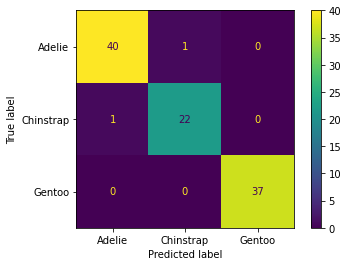

In [64]:
plot_confusion_matrix(rfc,X_test,y_test)

In [65]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [66]:
rfc.feature_importances_

array([3.46584088e-01, 1.20150588e-01, 2.39262547e-01, 1.48533620e-01,
       1.39253740e-01, 2.10550136e-05, 6.19436222e-03])

In [67]:
df = pd.read_csv('data_banknote_authentication.csv')

In [68]:
df.head()

Variance_Wavelet  Skewness_Wavelet  Curtosis_Wavelet  Image_Entropy  Class
0           3.62160            8.6661           -2.8073       -0.44699      0
1           4.54590            8.1674           -2.4586       -1.46210      0
2           3.86600           -2.6383            1.9242        0.10645      0
3           3.45660            9.5228           -4.0112       -3.59440      0
4           0.32924           -4.4552            4.5718       -0.98880      0

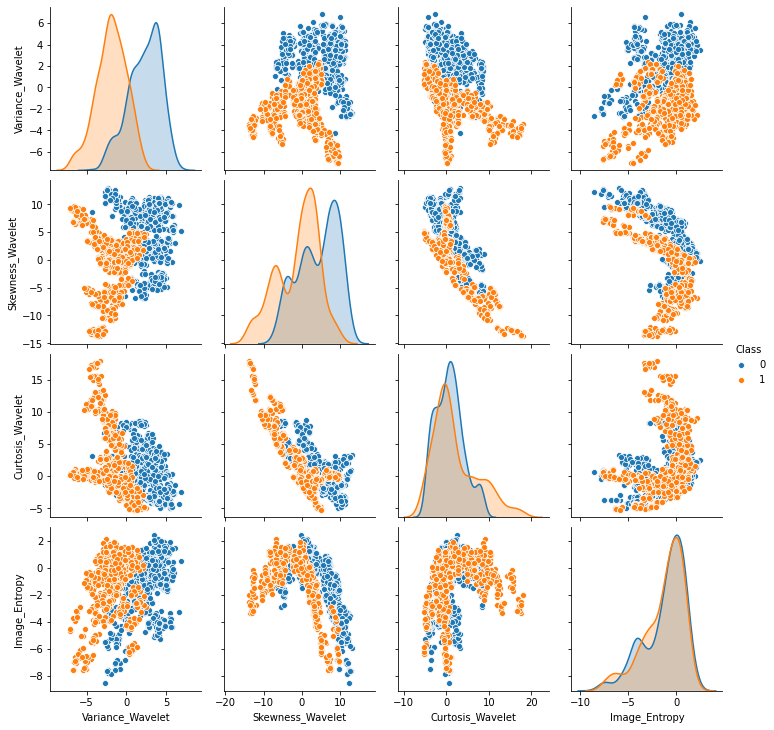

In [69]:
sns.pairplot(df,hue='Class')

In [70]:
df.isnull().sum()

Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64

In [71]:
X = df.drop('Class',axis=1)

In [72]:
y = df['Class']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
n_estimators = [64,100,128,200]

In [78]:
max_features = [2,3,4]

In [79]:
bootstrap = [True,False]

In [80]:
oob_score = [True,False]

In [81]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap':bootstrap,
              'oob_score':oob_score}

In [82]:
rfc = RandomForestClassifier()

In [83]:
grid = GridSearchCV(rfc,param_grid=param_grid)

In [84]:
grid.fit(X_train,y_train)

on.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\risha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\risha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\risha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\risha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _f

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [85]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [92]:
grid.best_score_

0.9948571218957486

In [93]:
predictions = grid.predict(X_test)

In [97]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



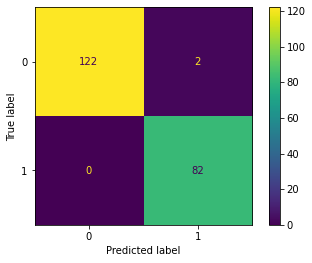

In [96]:
plot_confusion_matrix(grid,X_test,y_test)

In [98]:
errors = []
misclassification = []

for n in range(1,200):

    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds =rfc.predict(X_test)
    err = 1 - accuracy_score(y_test,preds) 
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassification.append(n_missed)

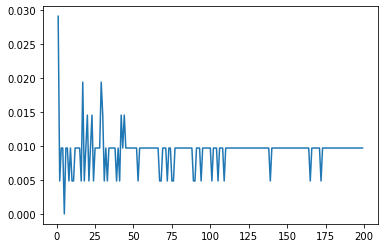

In [99]:
plt.plot(range(1,200),errors)

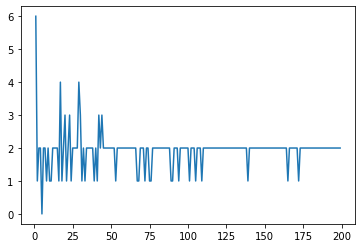

In [100]:
plt.plot(range(1,200),misclassification)

In [102]:
df = pd.read_csv('rock_density_xray.csv')

In [103]:
df.head()

Rebound Signal Strength nHz  Rock Density kg/m3
0                    72.945124            2.456548
1                    14.229877            2.601719
2                    36.597334            1.967004
3                     9.578899            2.300439
4                    21.765897            2.452374

In [104]:
df.columns = ['Signal','Density']

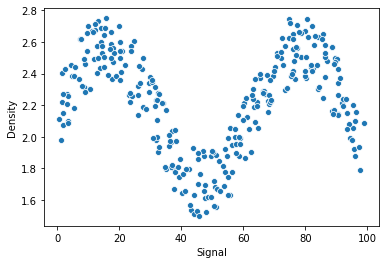

In [106]:
sns.scatterplot(data=df,x='Signal',y='Density')

In [113]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lr_model = LinearRegression()

In [118]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [119]:
lr_preds = lr_model.predict(X_test)

In [120]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [121]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [122]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [123]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.25700519965846297

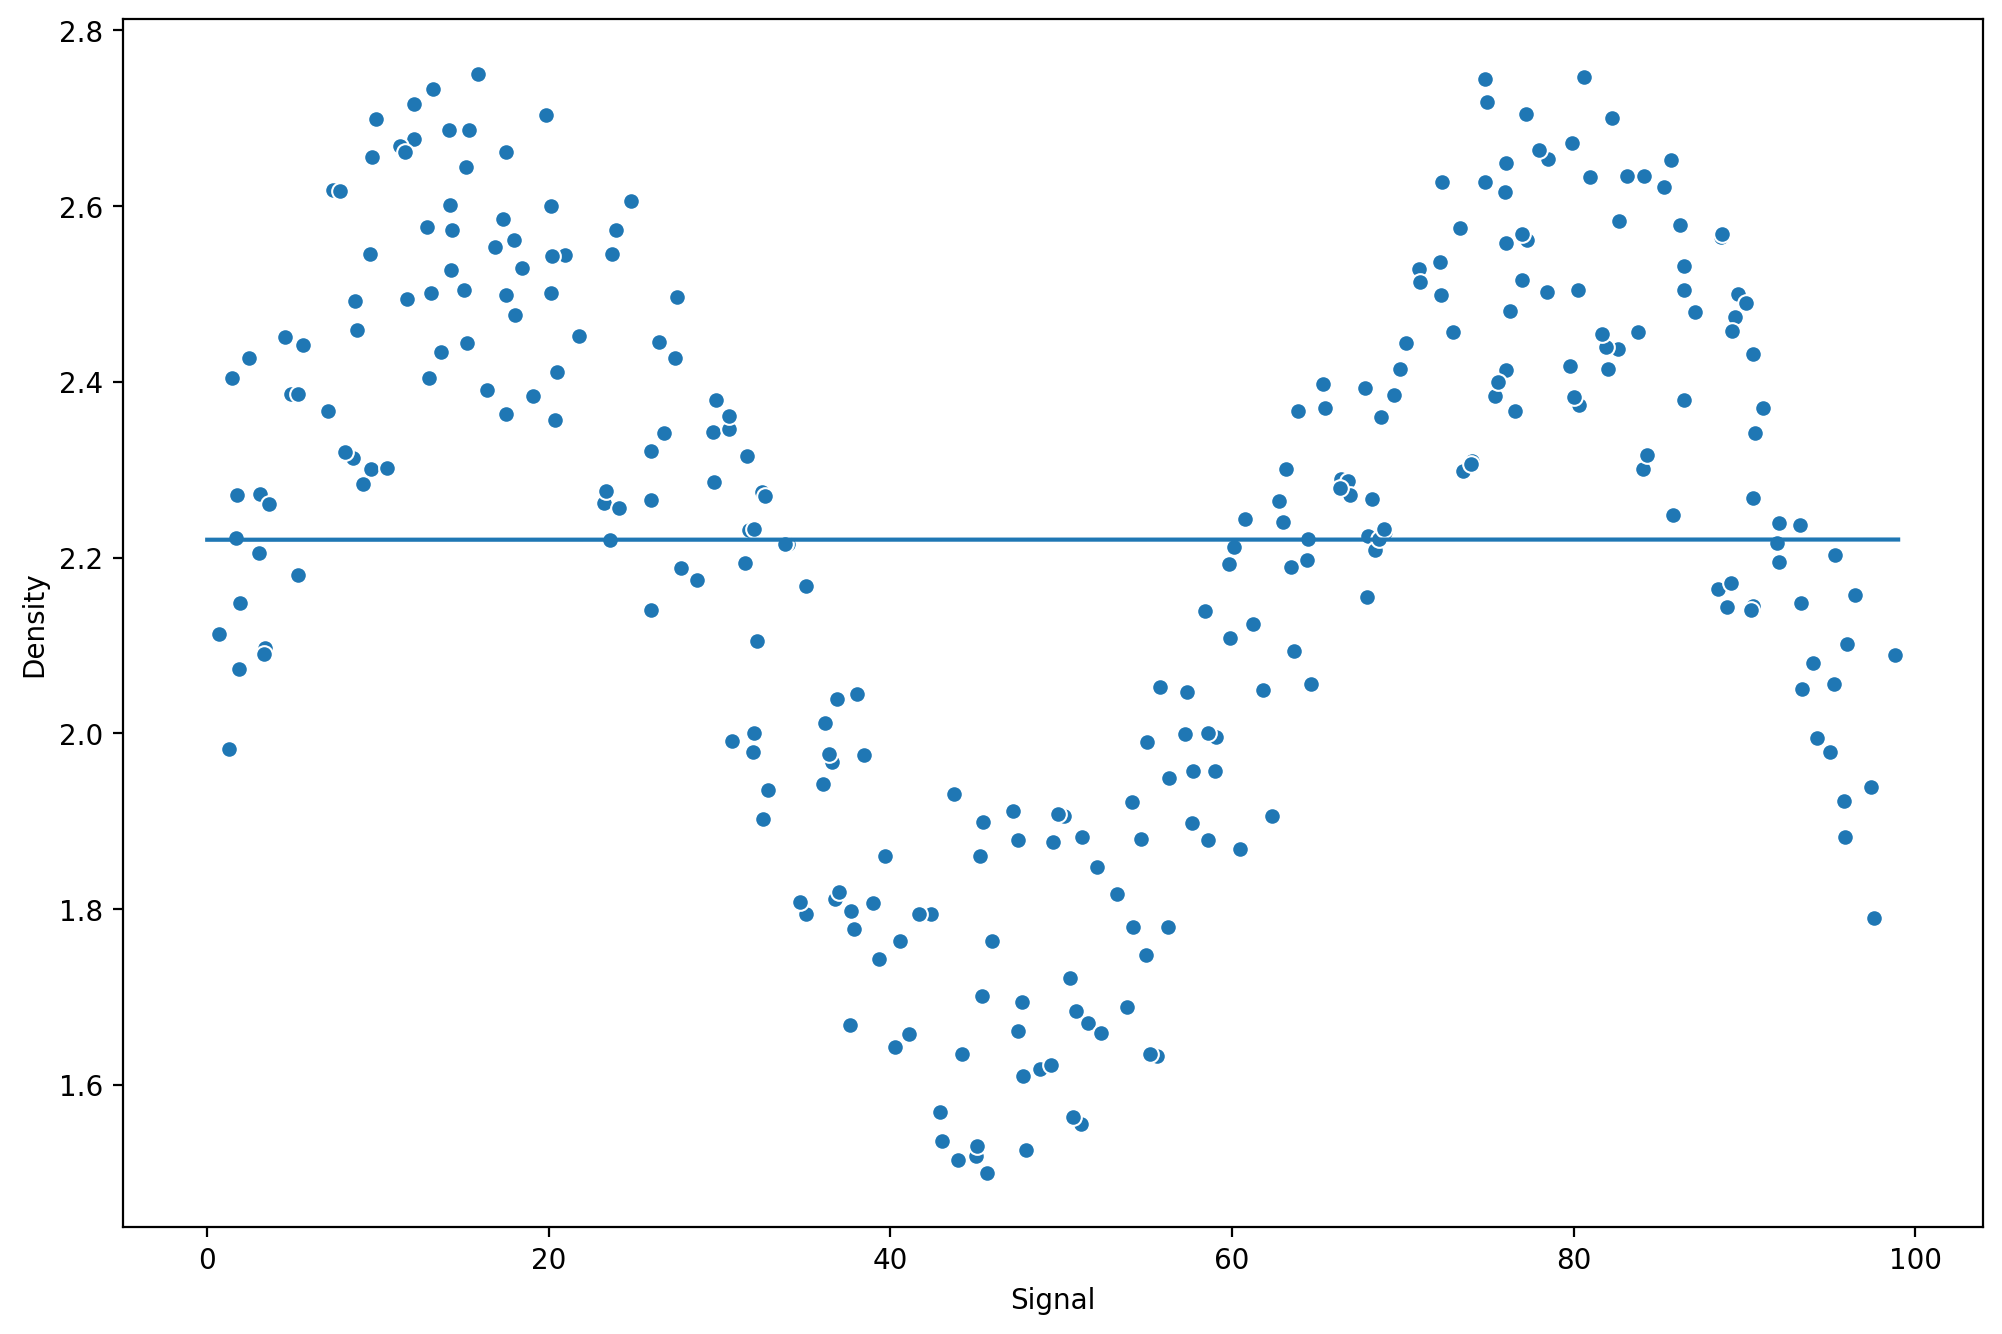

In [129]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df,x='Signal',y='Density')

signal_range = np.arange(100).reshape(-1,1)
plt.plot(x,lr_model.predict(signal_range))

In [131]:
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')

    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(data=df,x='Signal',y='Density',color='black')
    signal_range = np.arange(100).reshape(-1,1)
    plt.plot(signal_range,model.predict(signal_range))

MAE: 0.211198973318633
RMSE: 0.25700519965846297


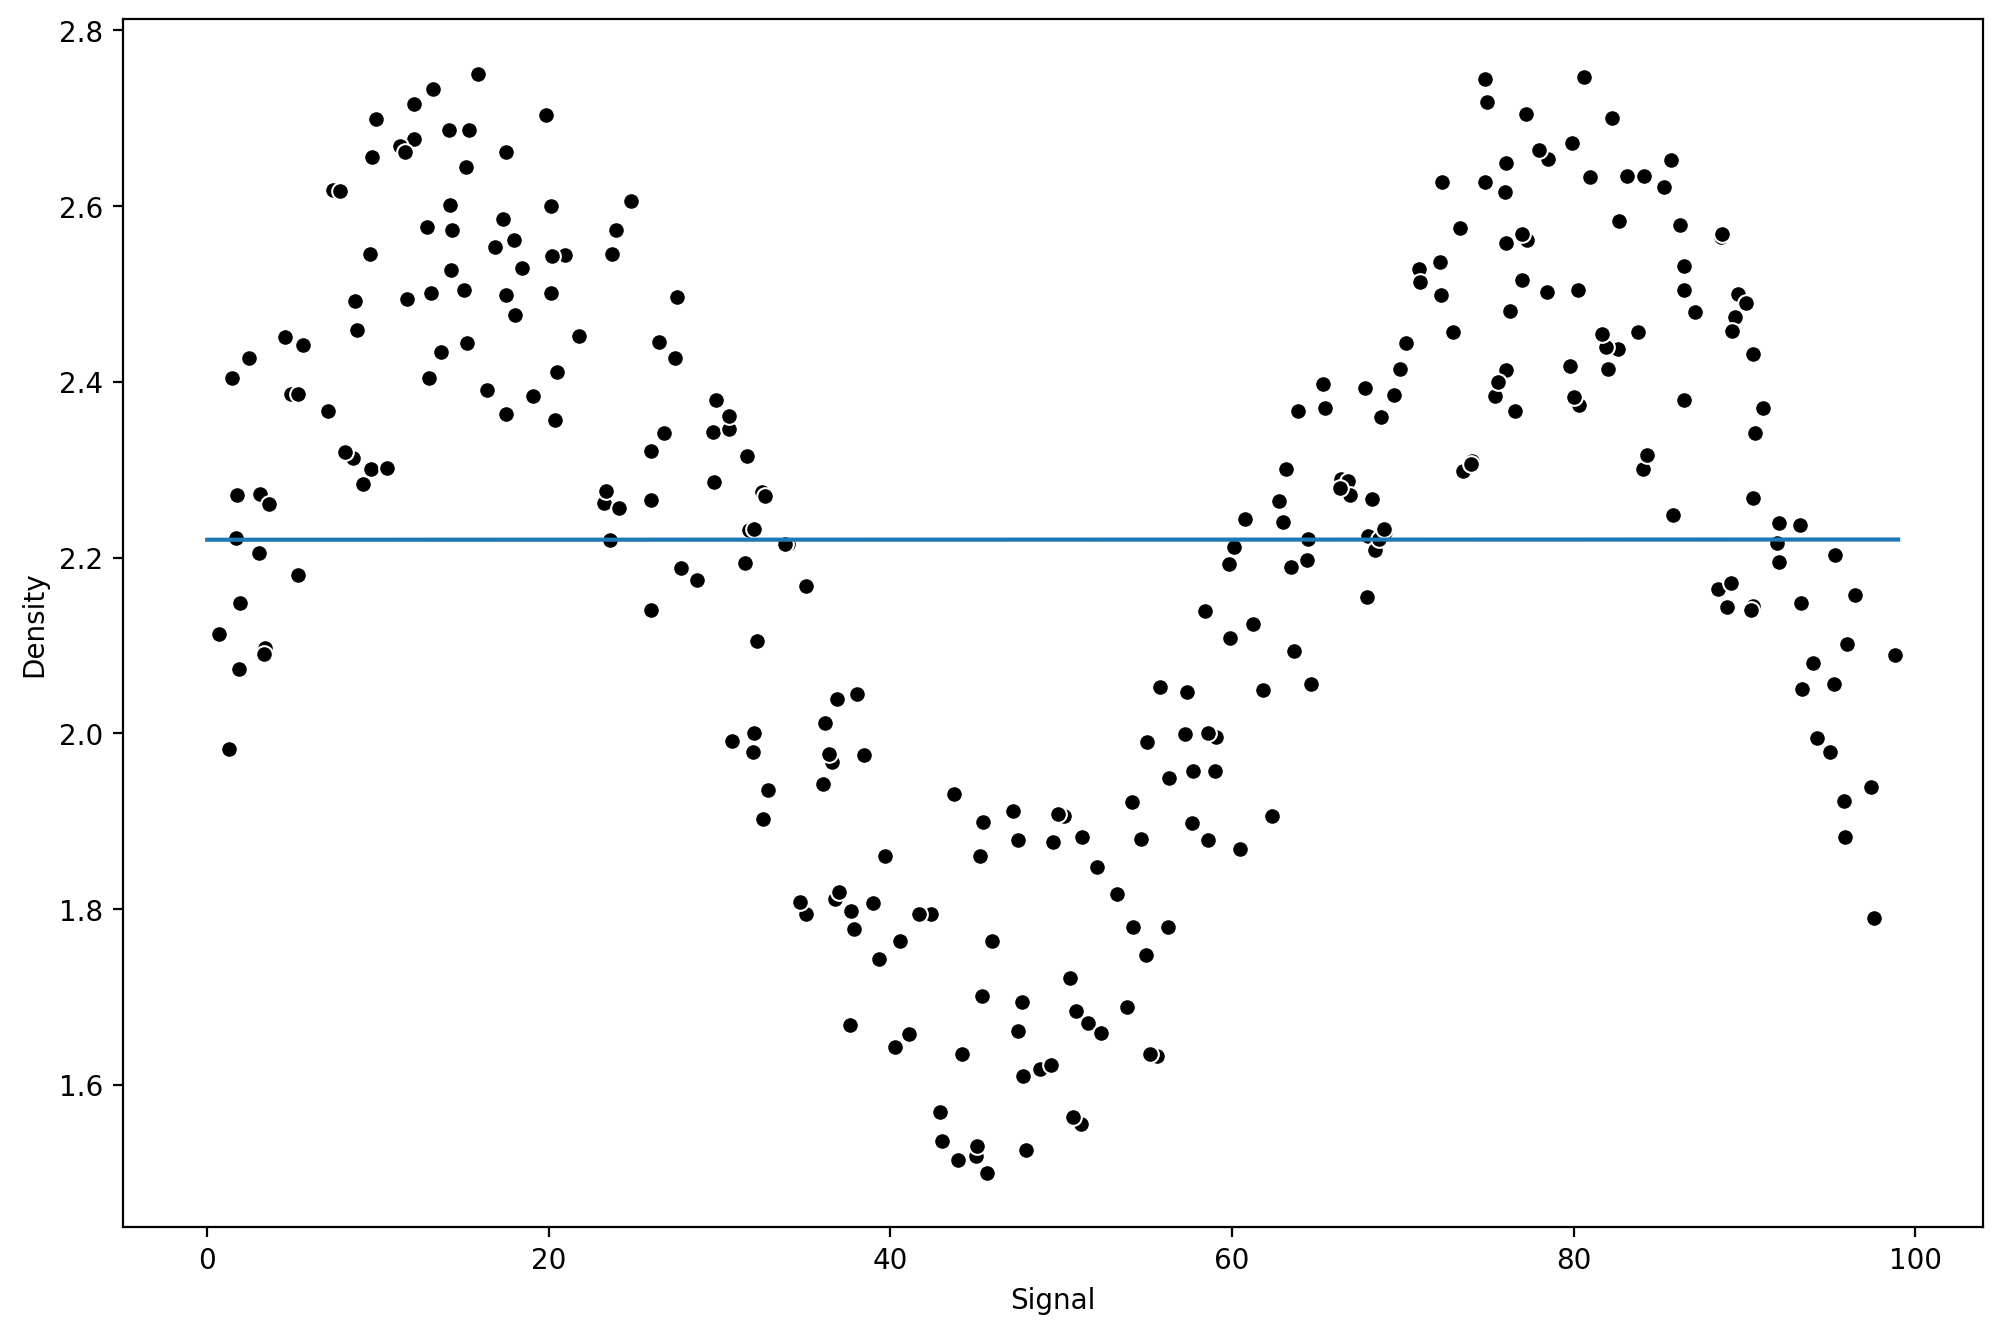

In [132]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)


In [133]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [134]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

MAE: 0.22903105443511168
RMSE: 0.28173095637255463


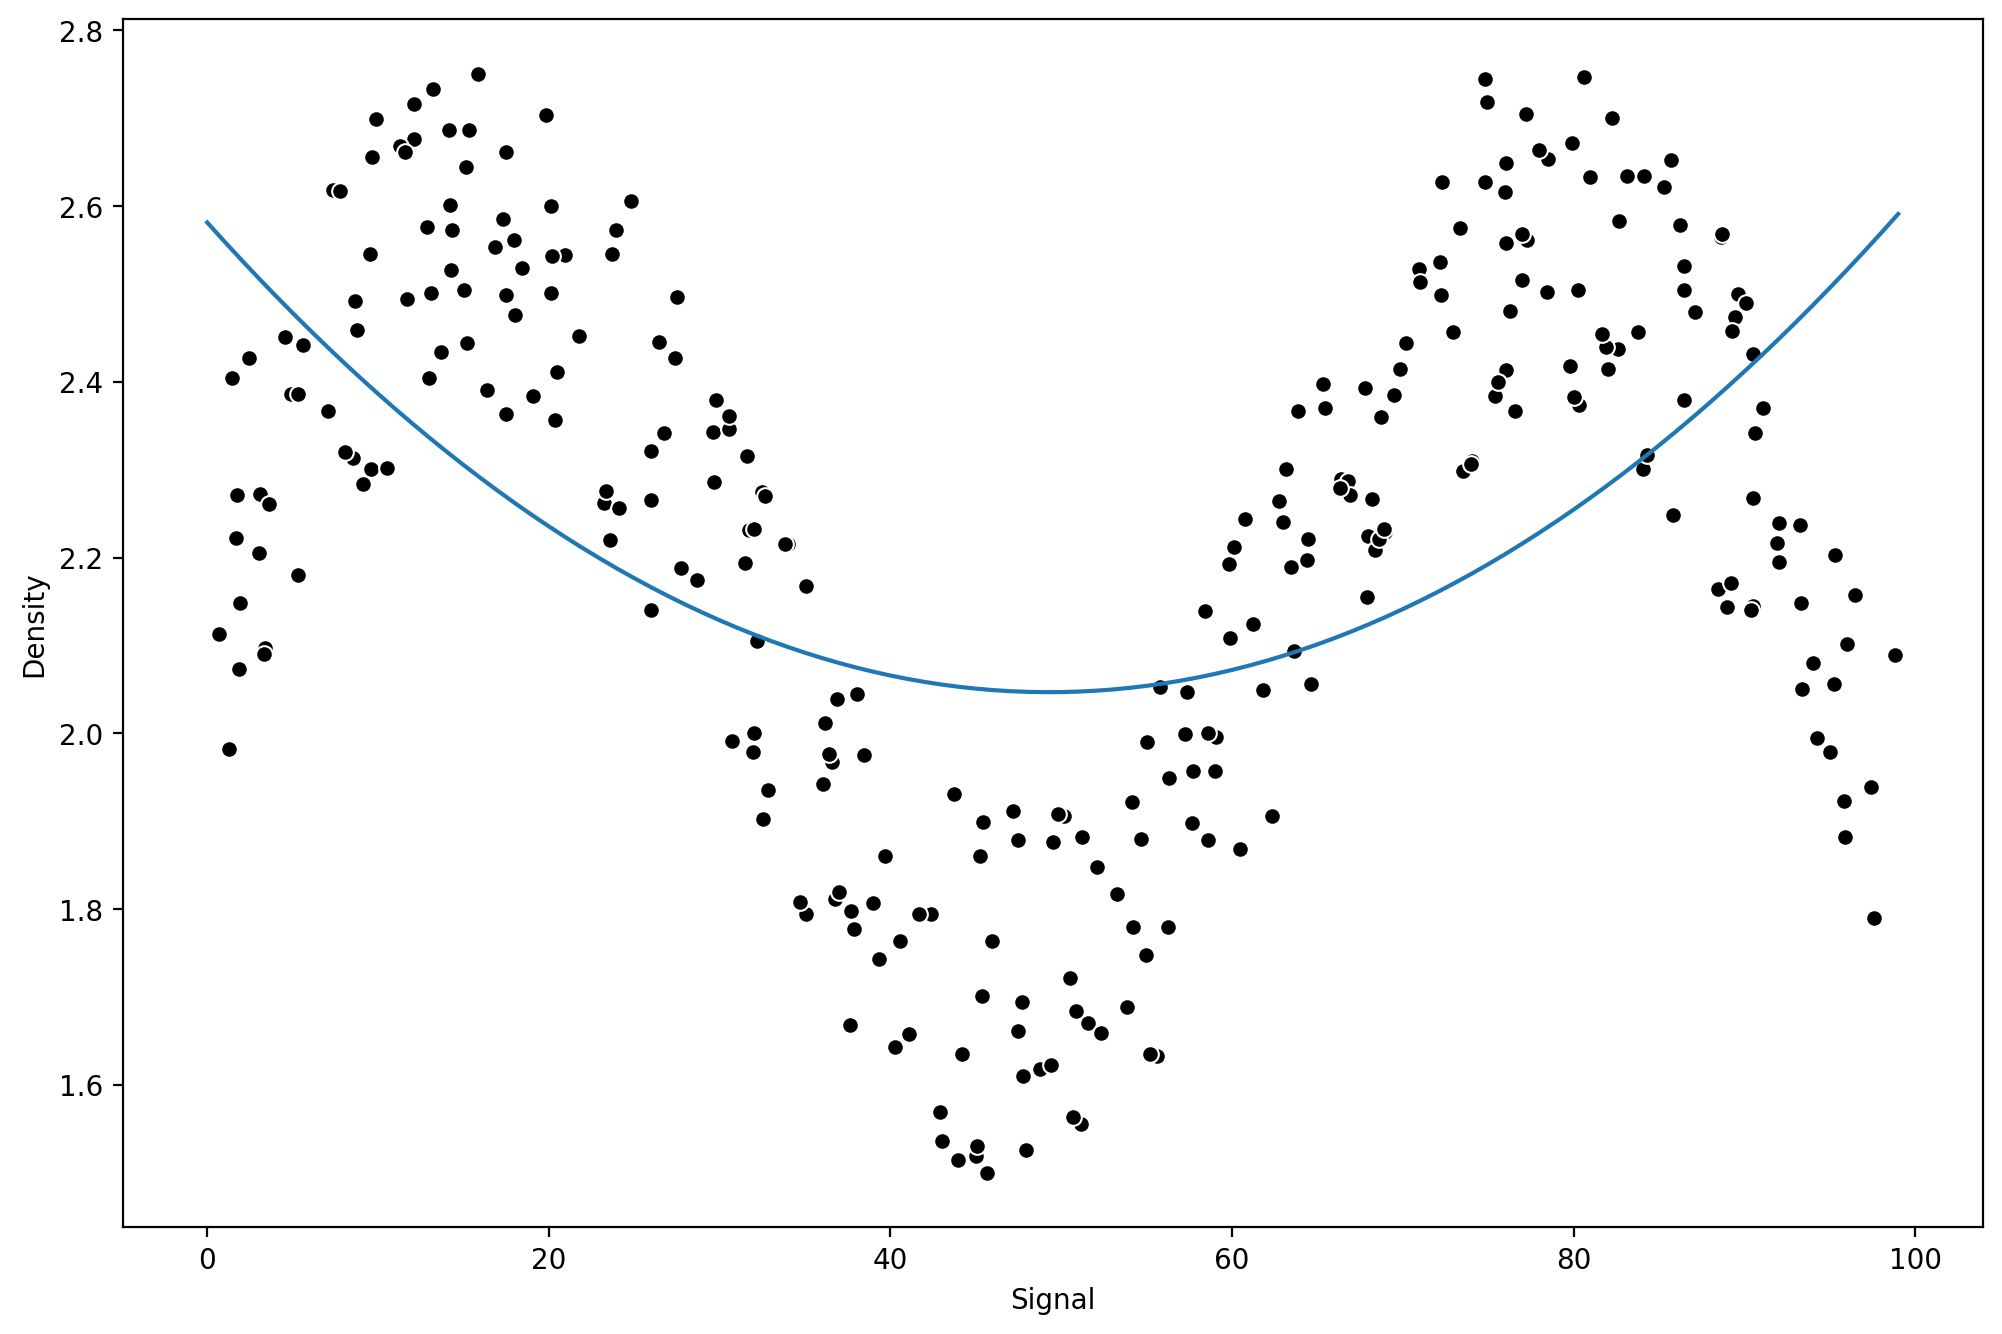

In [135]:
run_model(pipe,X_train,y_train,X_test,y_test)

MAE: 0.11883830992624961
RMSE: 0.1361959182994399


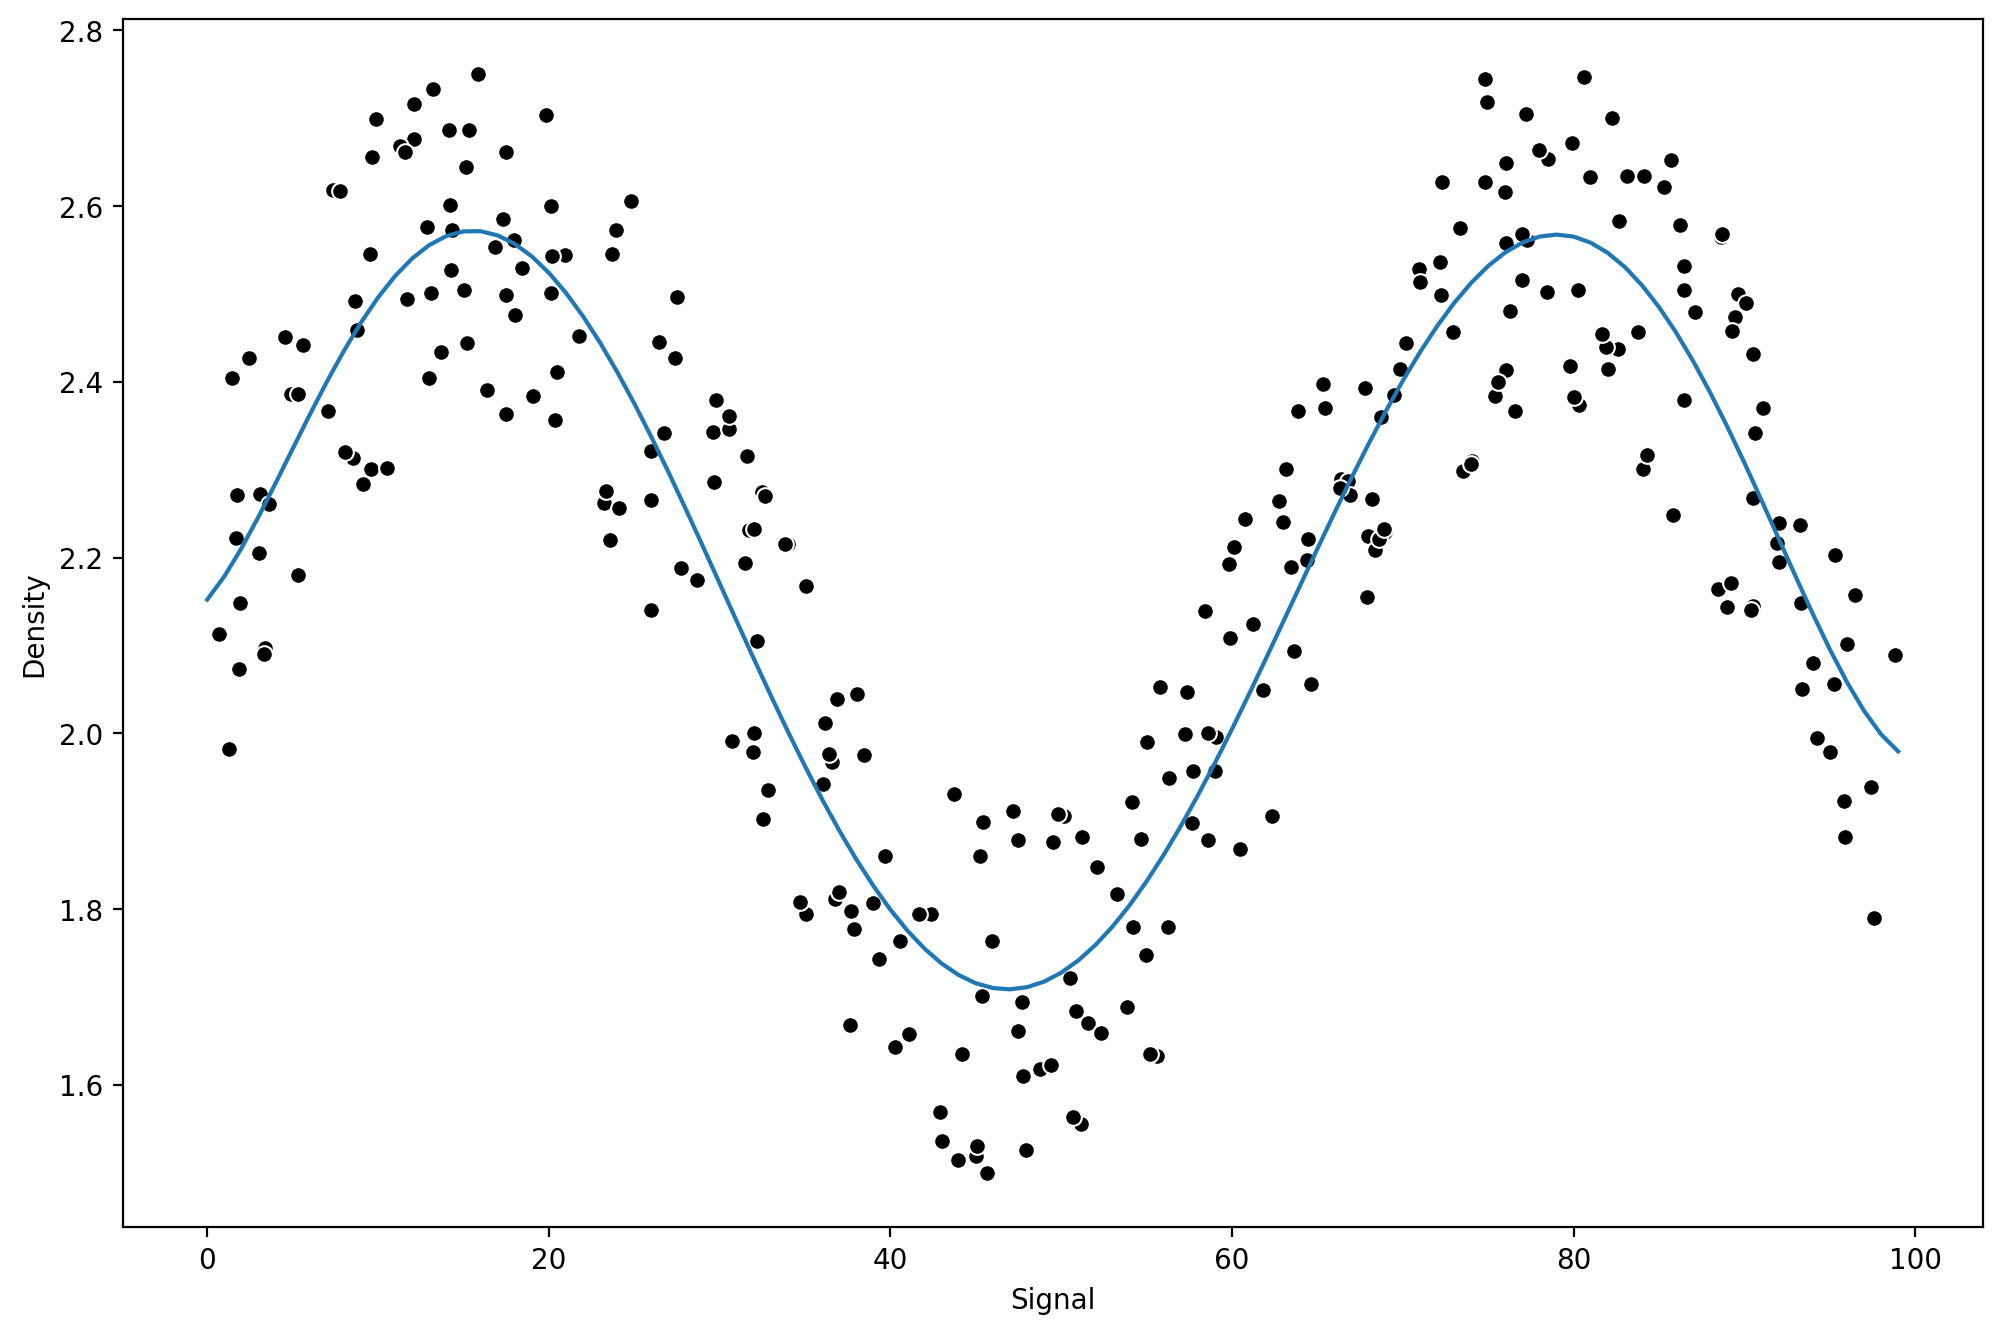

In [136]:
pipe = make_pipeline(PolynomialFeatures(degree=7),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

MAE: 0.1305576853618507
RMSE: 0.15200107954894926


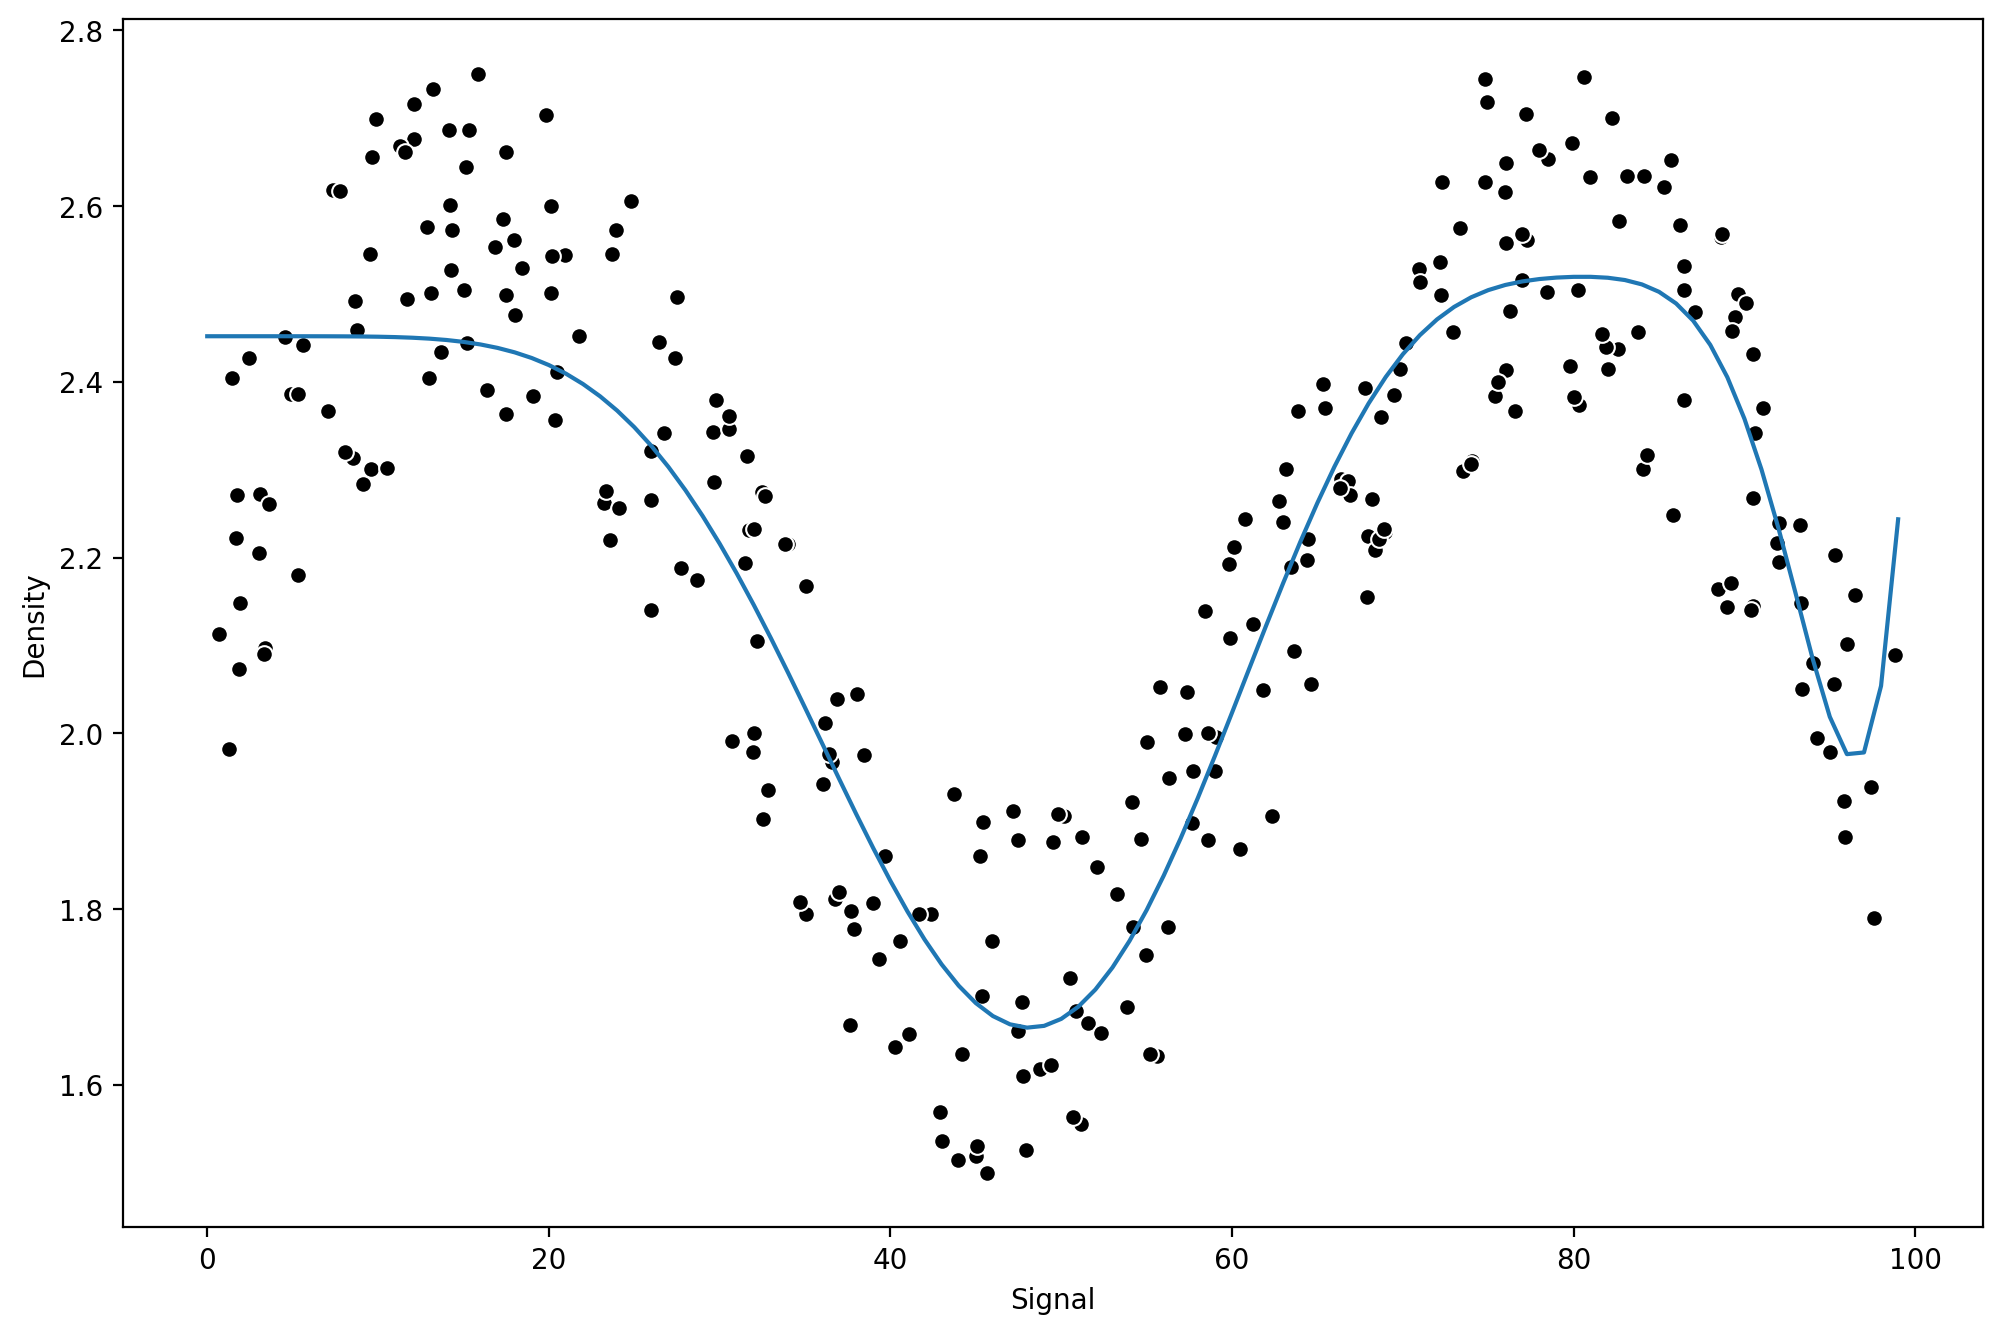

In [137]:
pipe = make_pipeline(PolynomialFeatures(degree=12),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

In [138]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442382
RMSE: 0.15234870286353372
MAE: 0.12198383614100564
RMSE: 0.13730685016923655
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


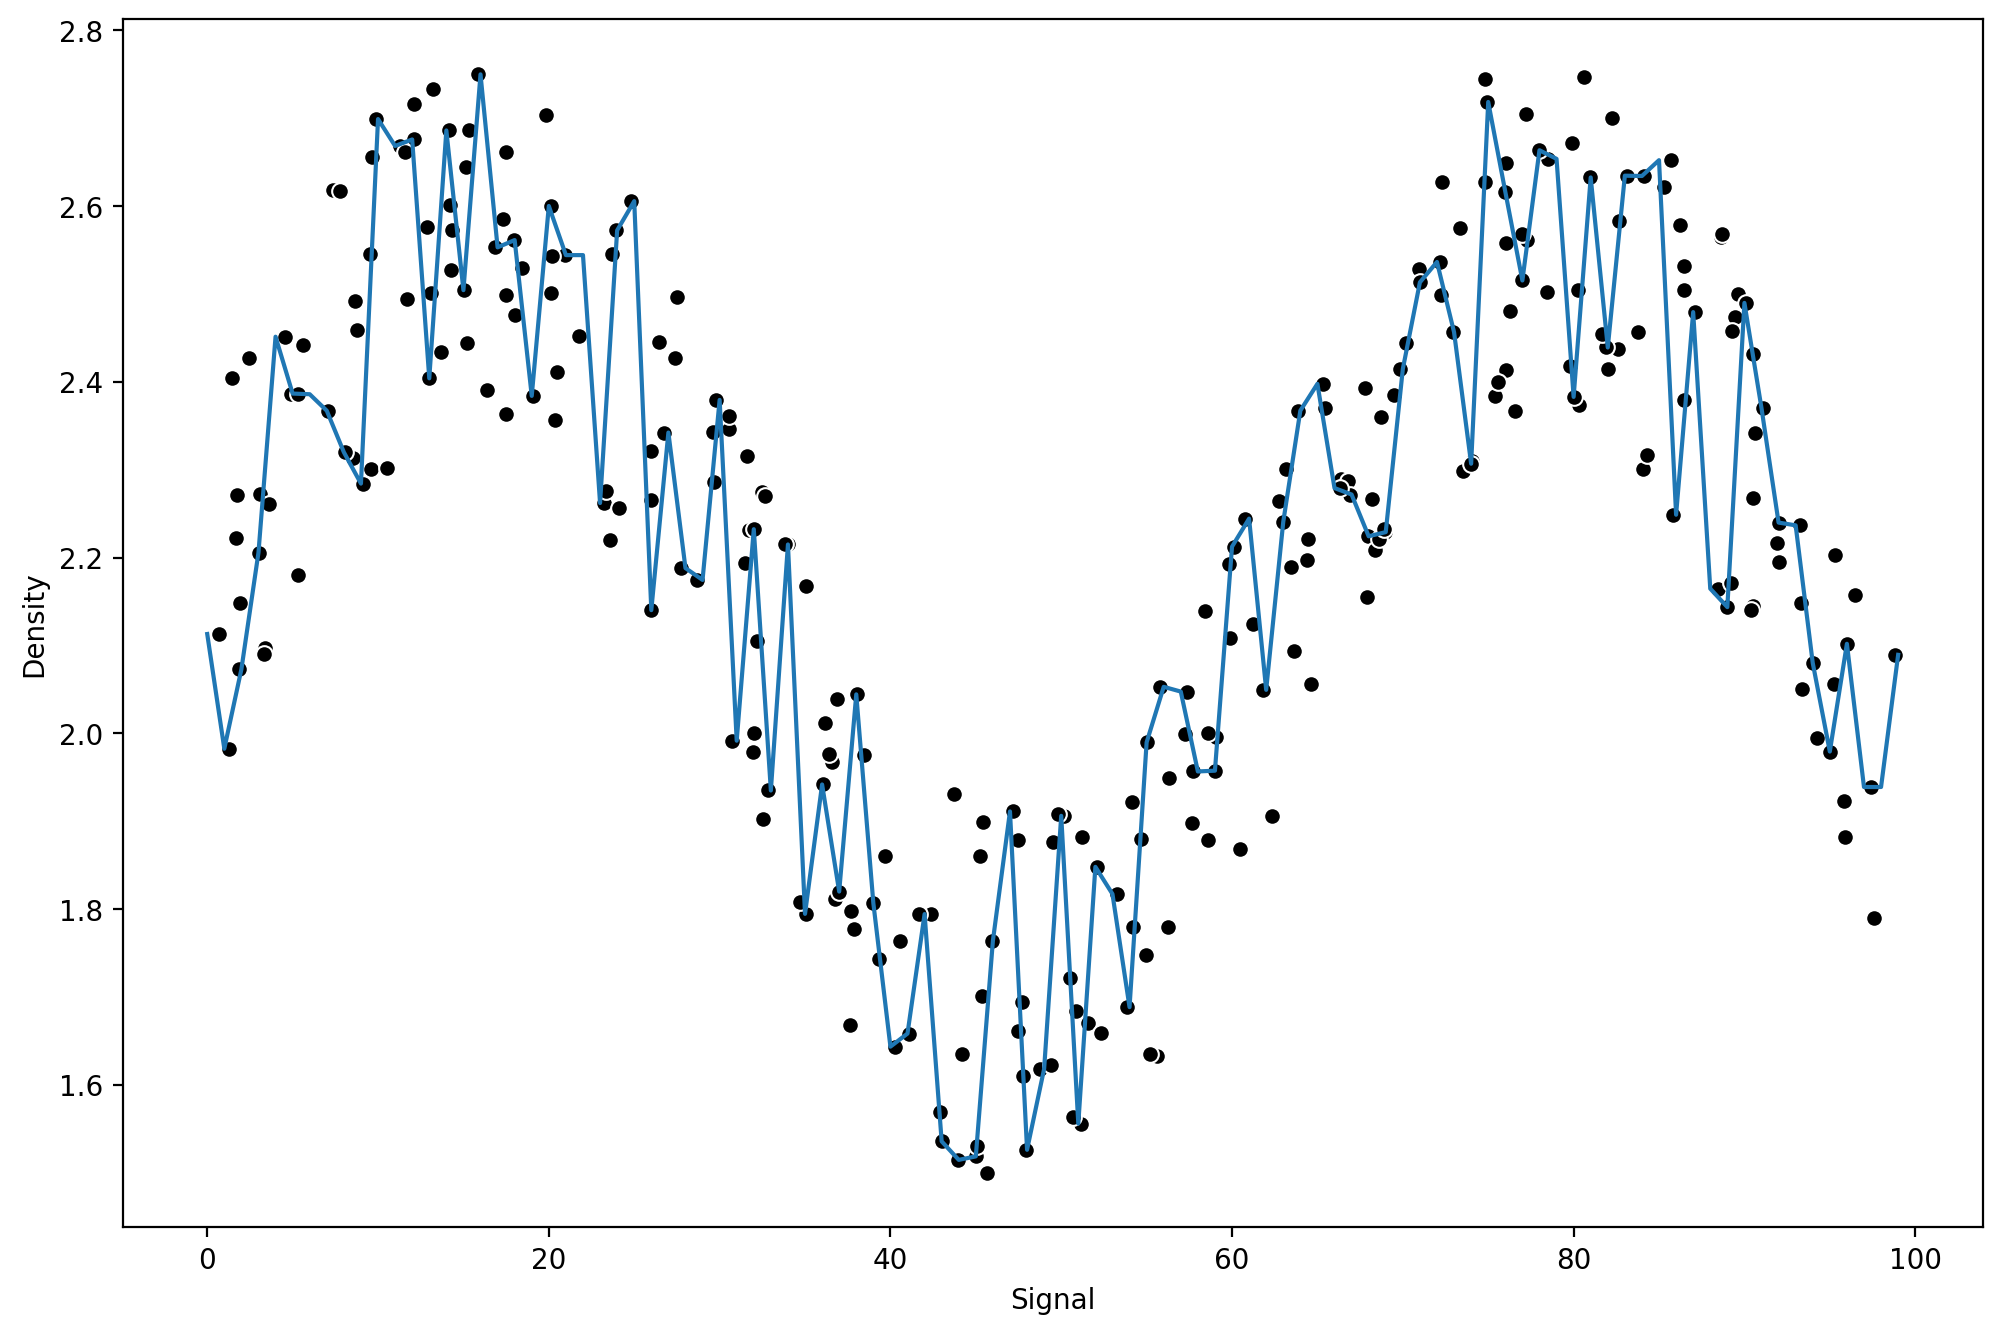

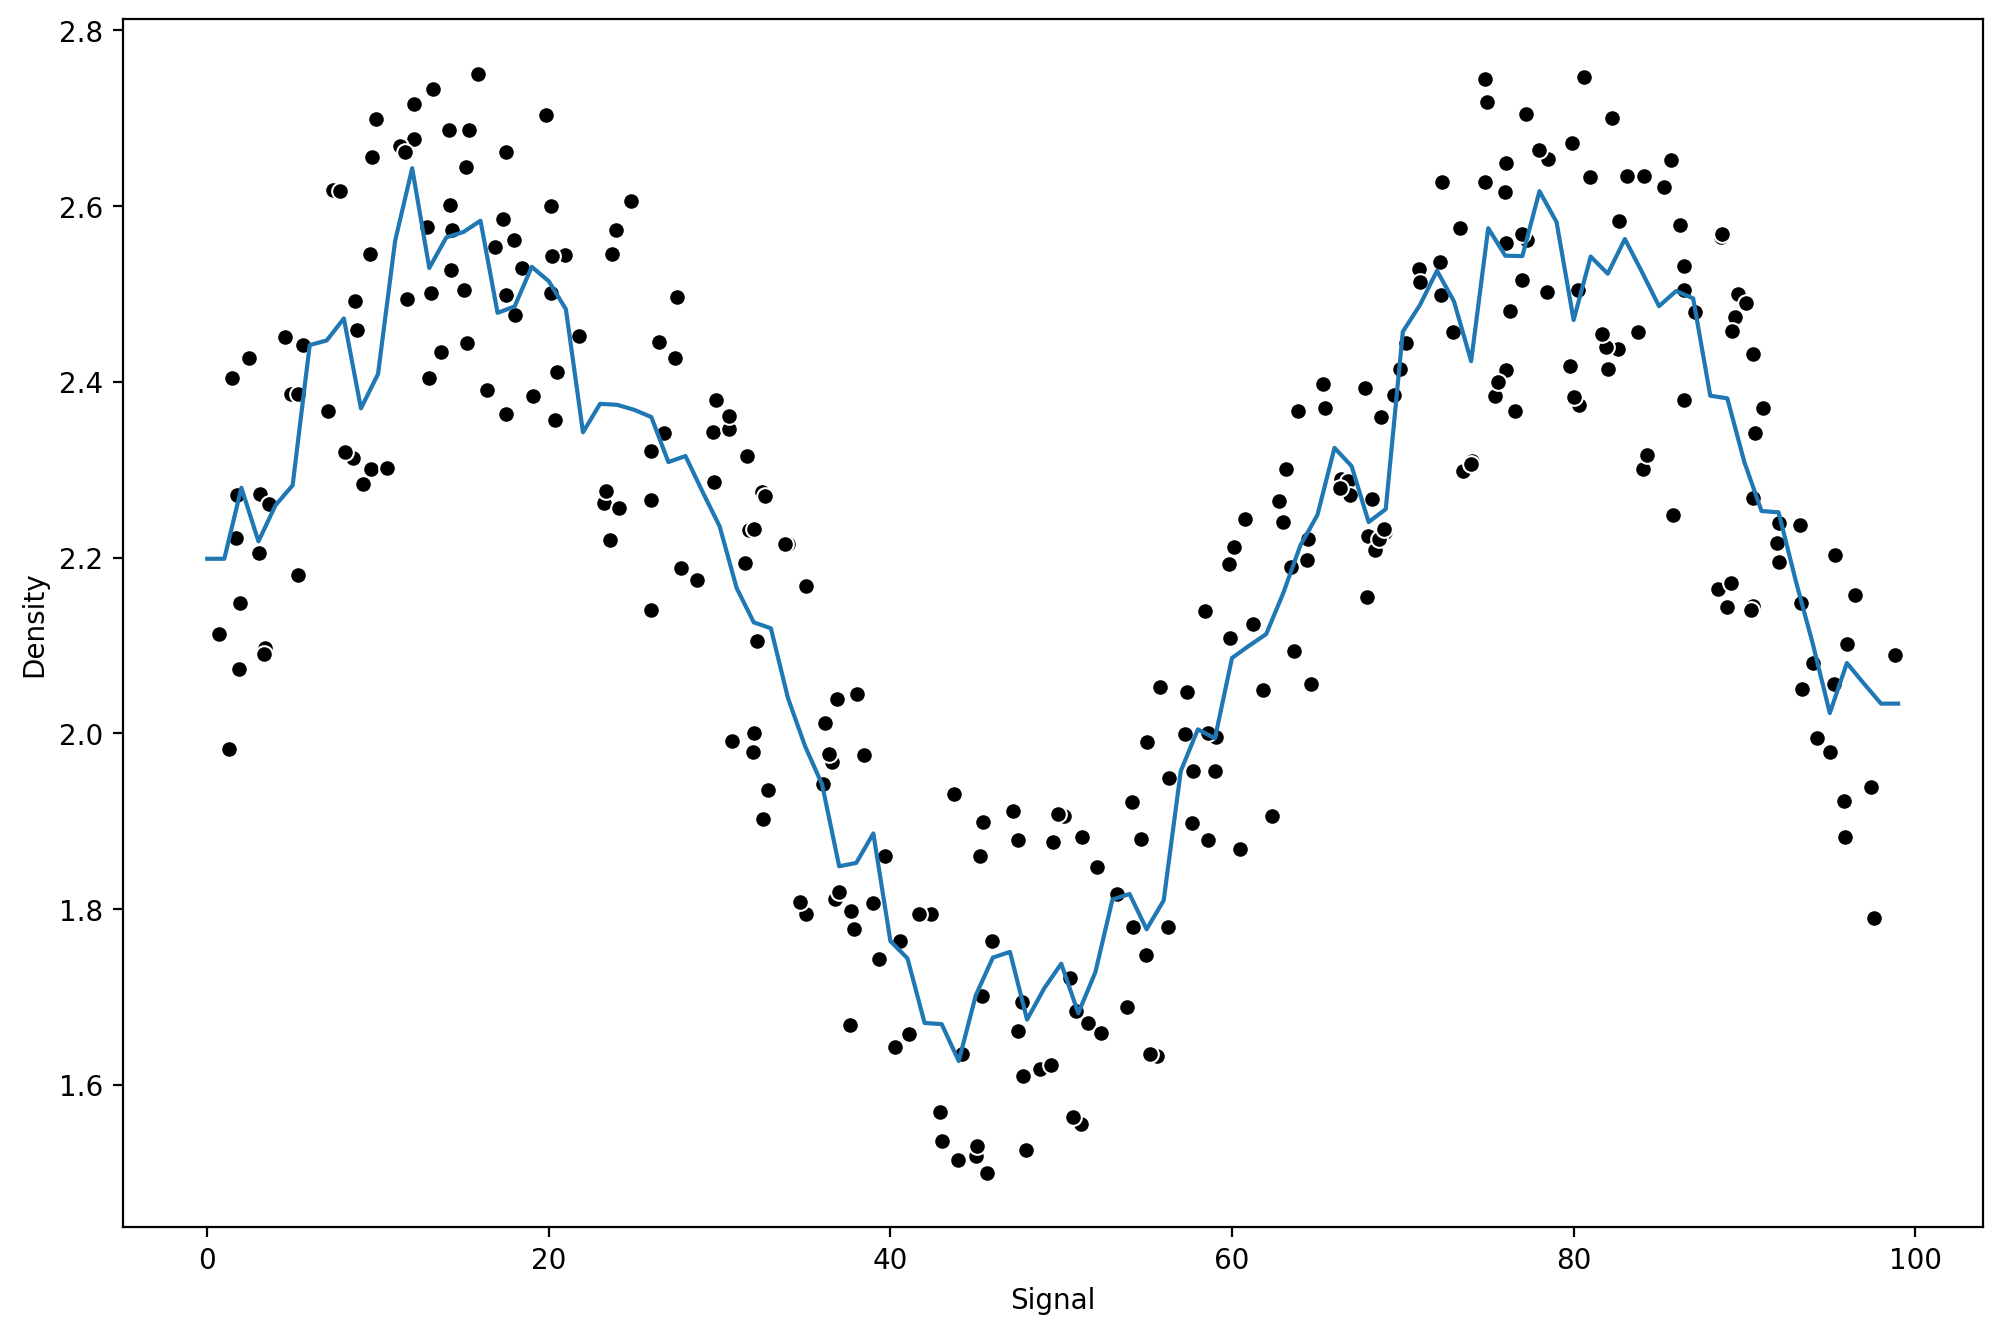

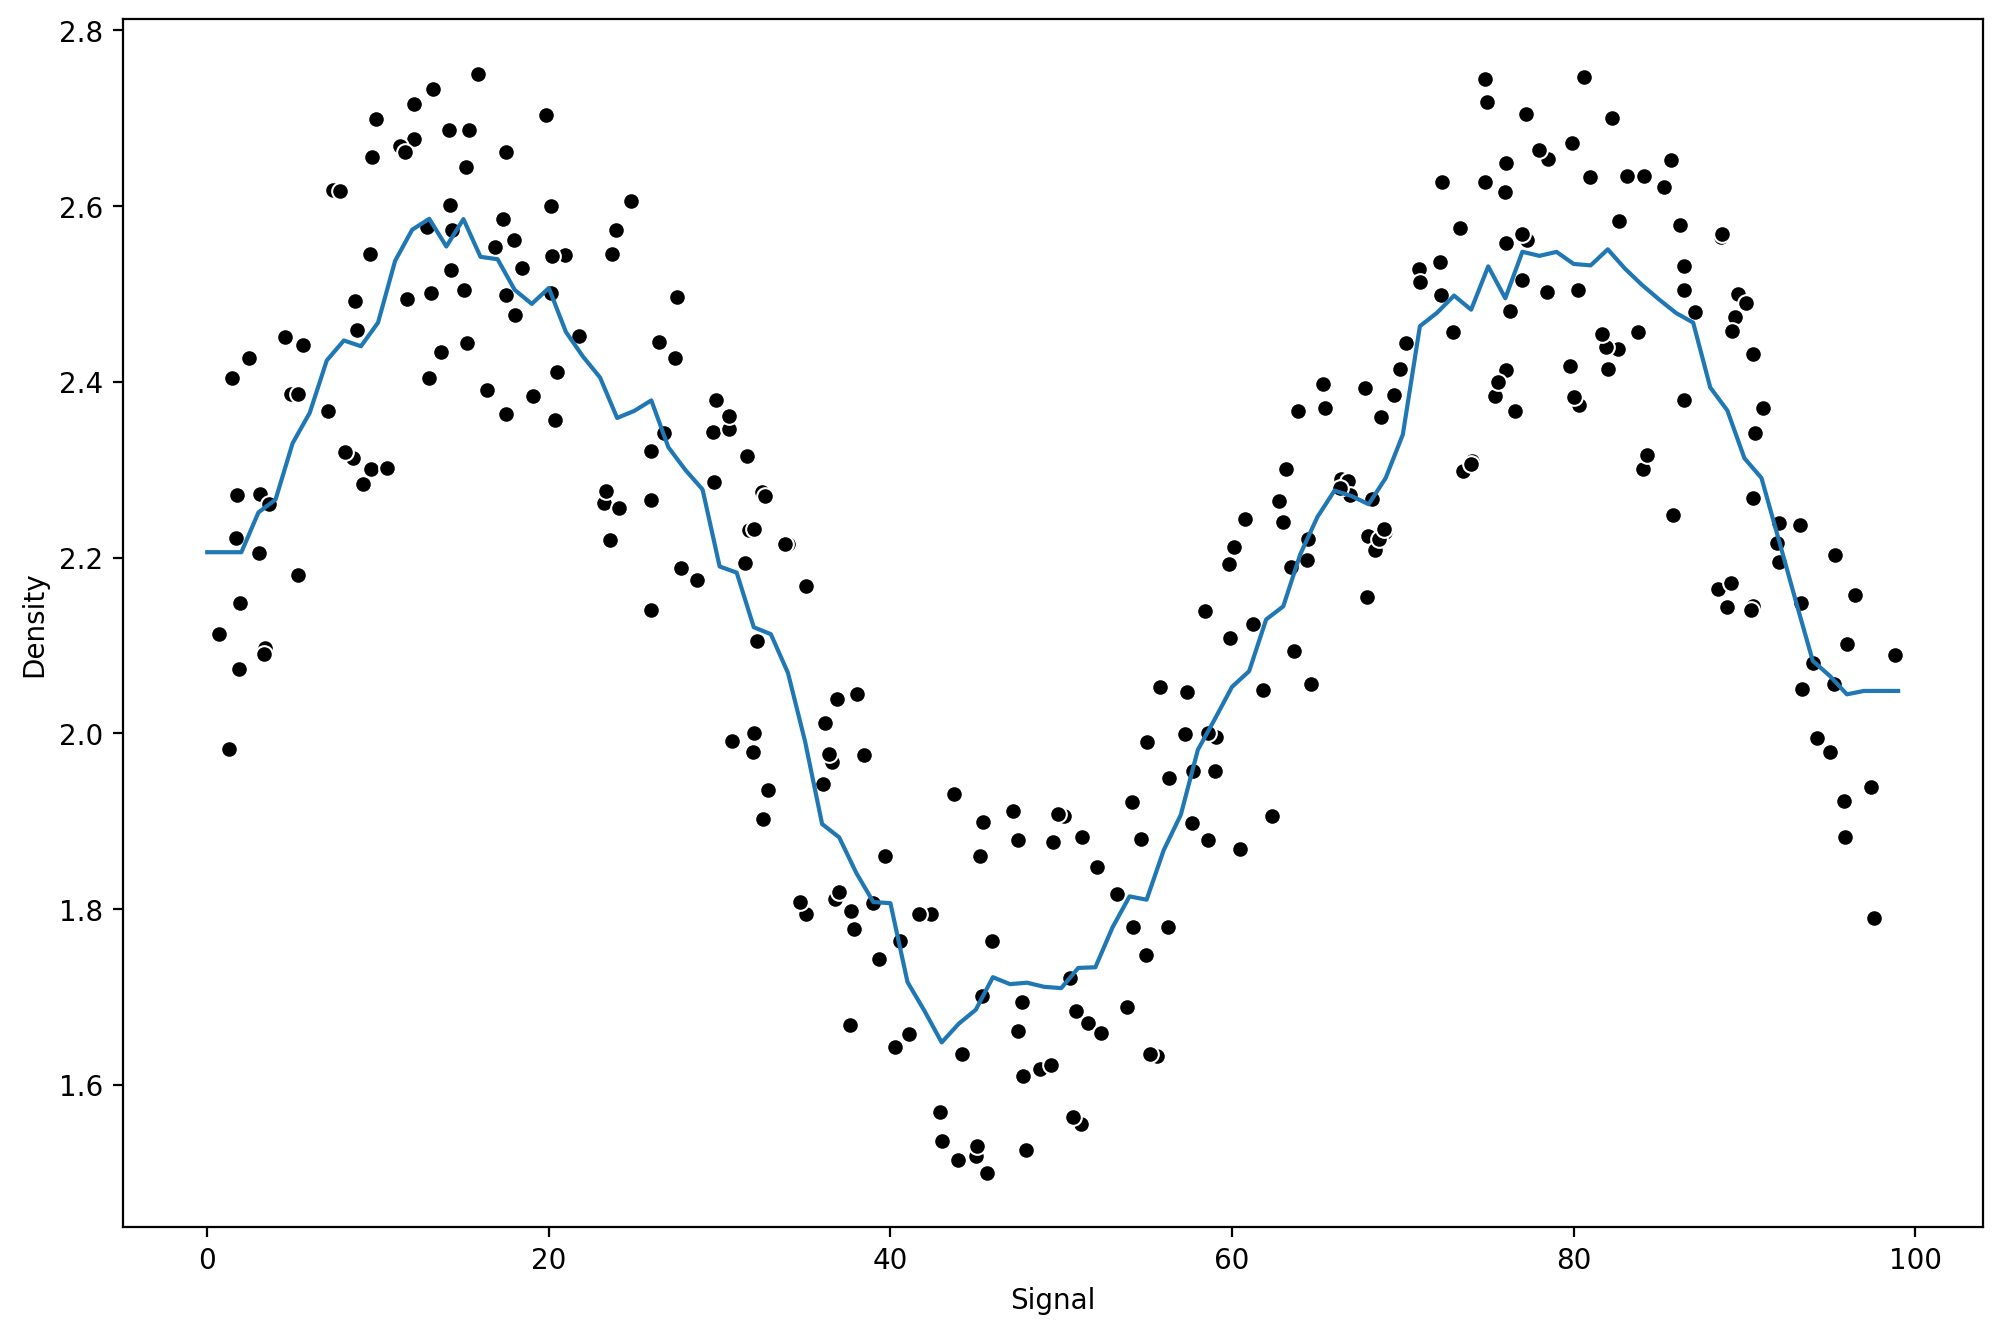

In [140]:
k_values = [1,5,10]

for n in k_values:
    model =KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [141]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442382
RMSE: 0.15234870286353372


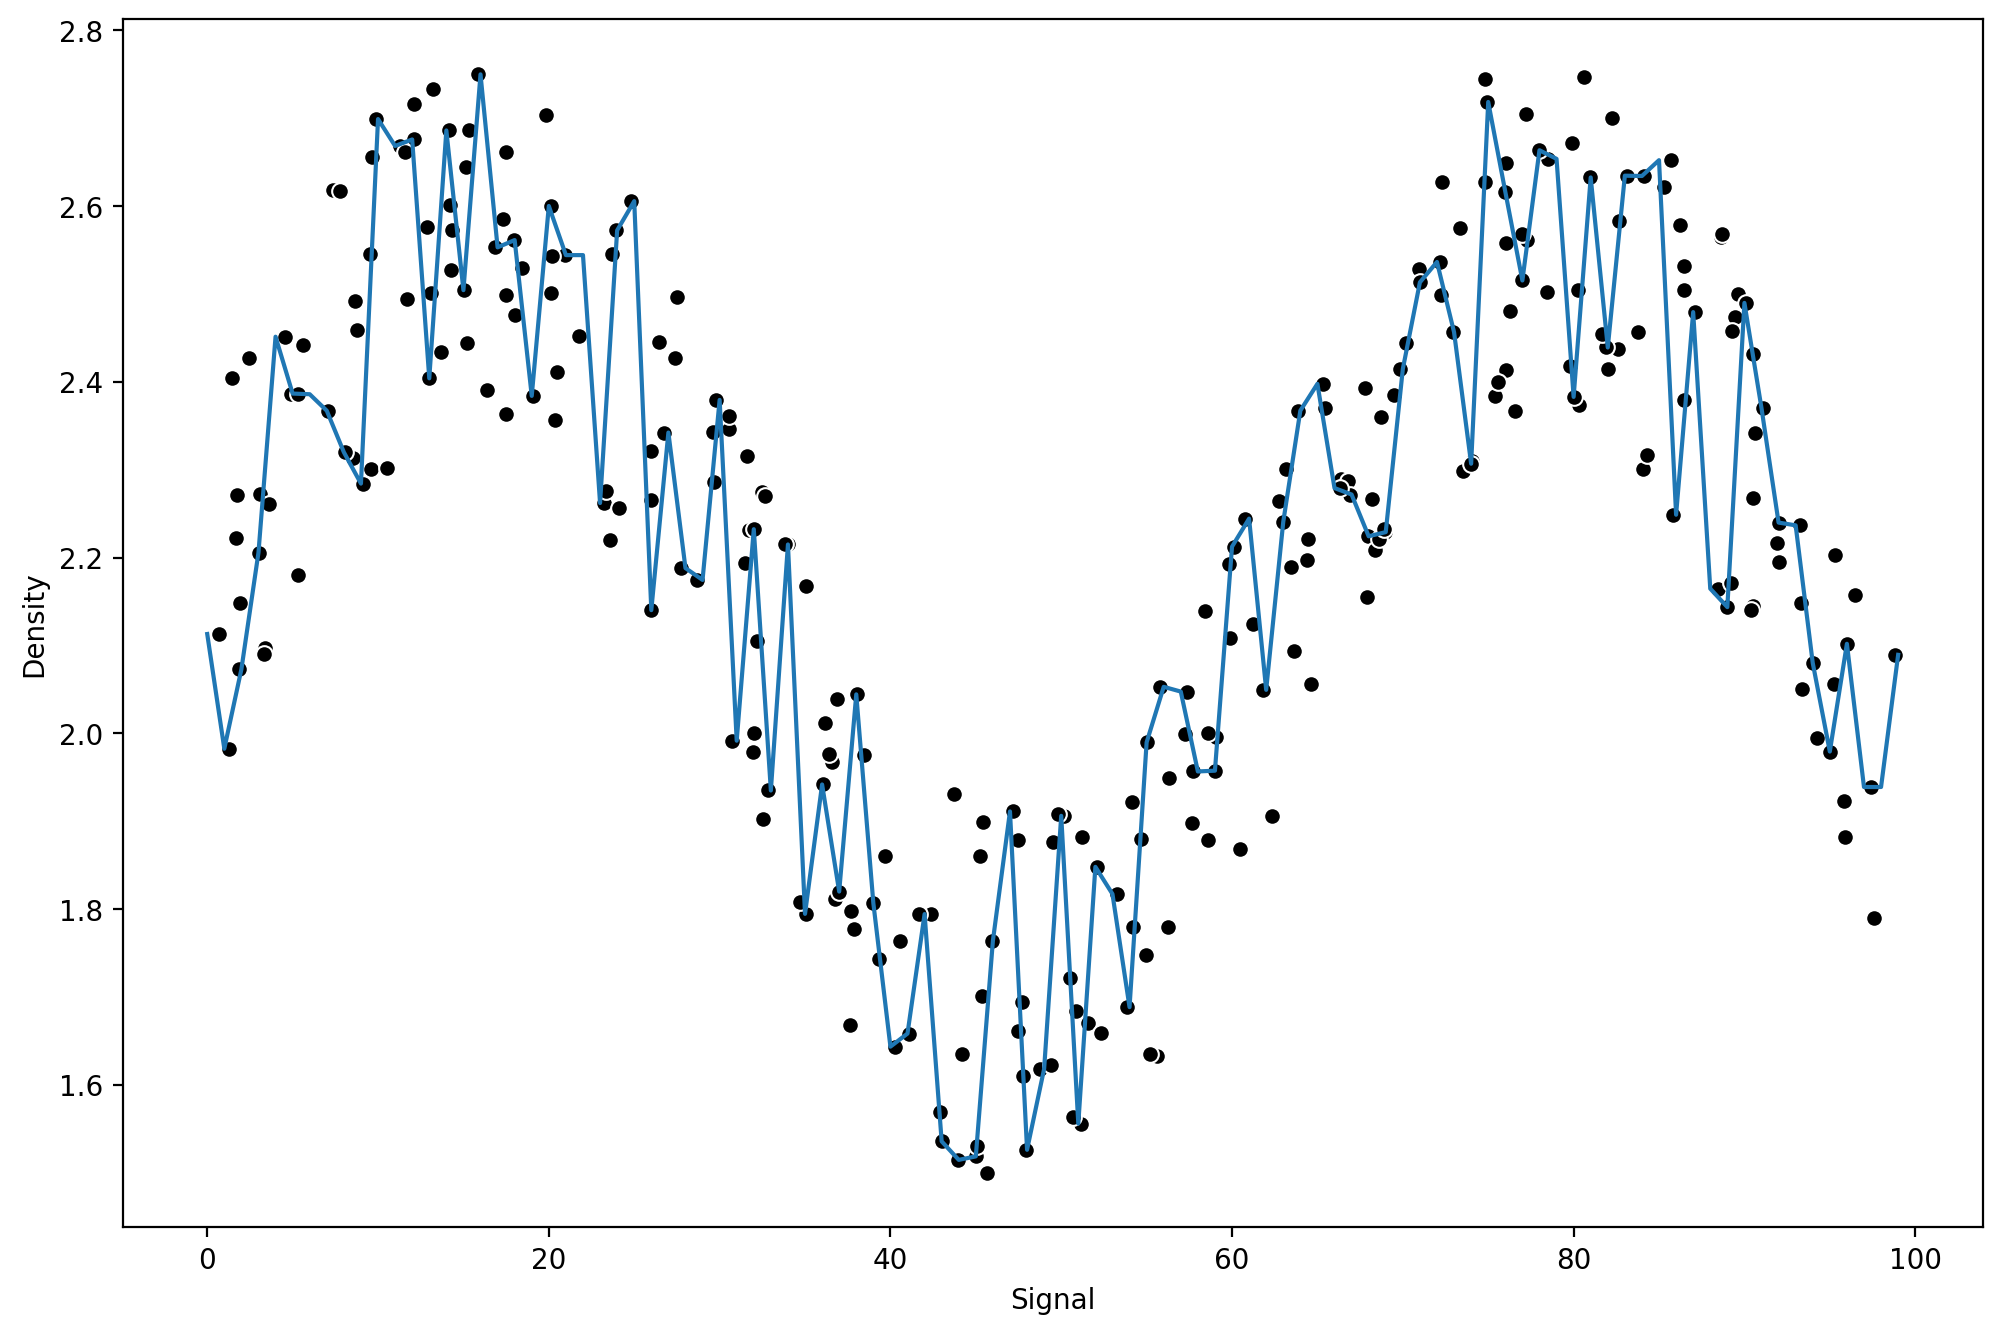

In [142]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [143]:
from sklearn.svm import SVR

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
              'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid=param_grid)

MAE: 0.10839253242165772
RMSE: 0.12634668775105407


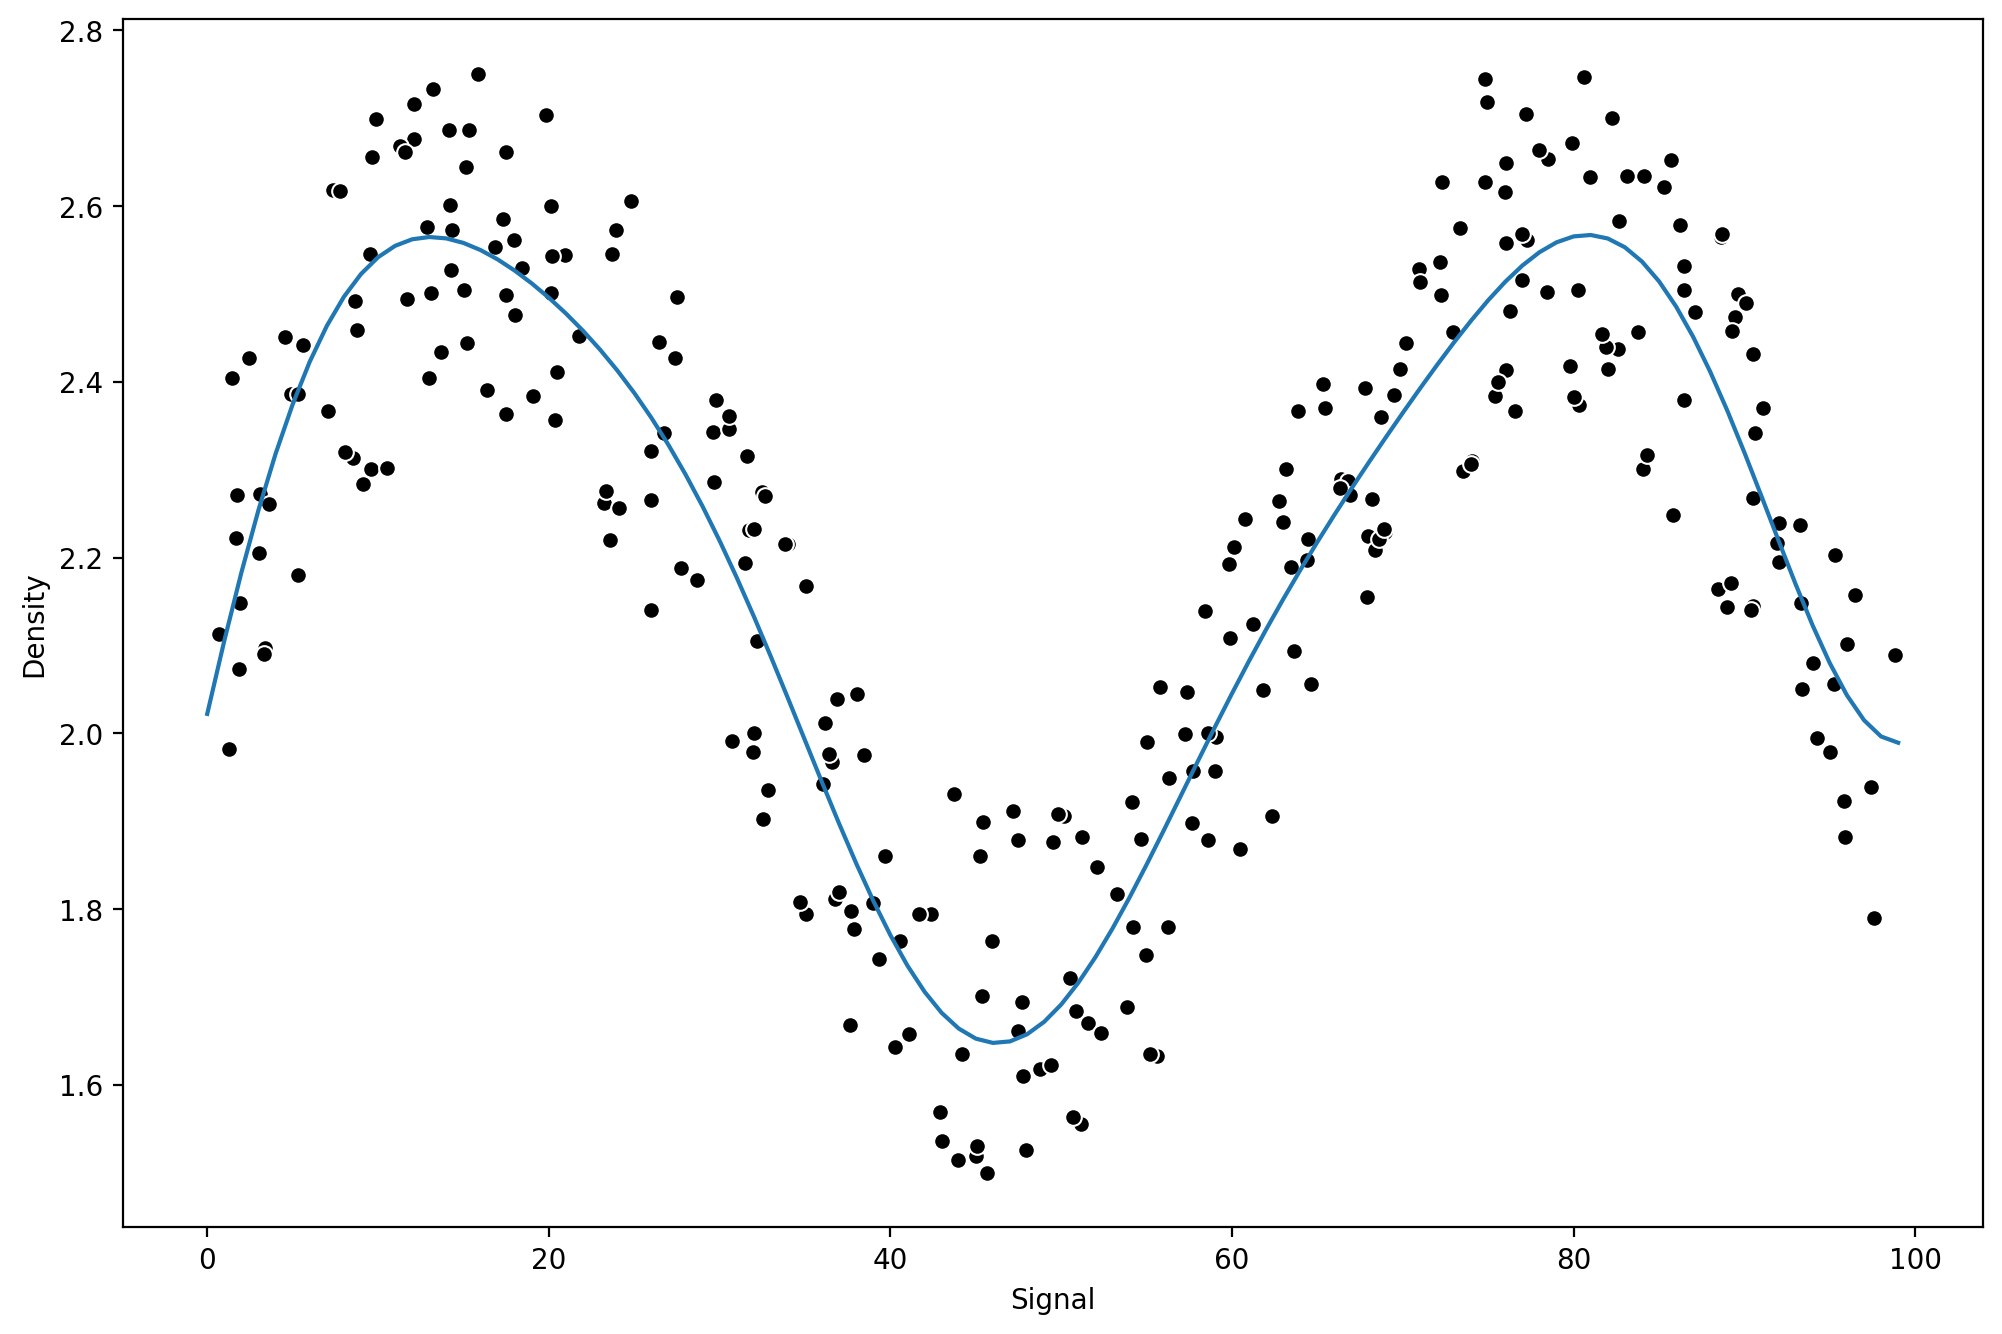

In [146]:
run_model(grid,X_train,y_train,X_test,y_test)

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.1178099697181753
RMSE: 0.13792075182266303


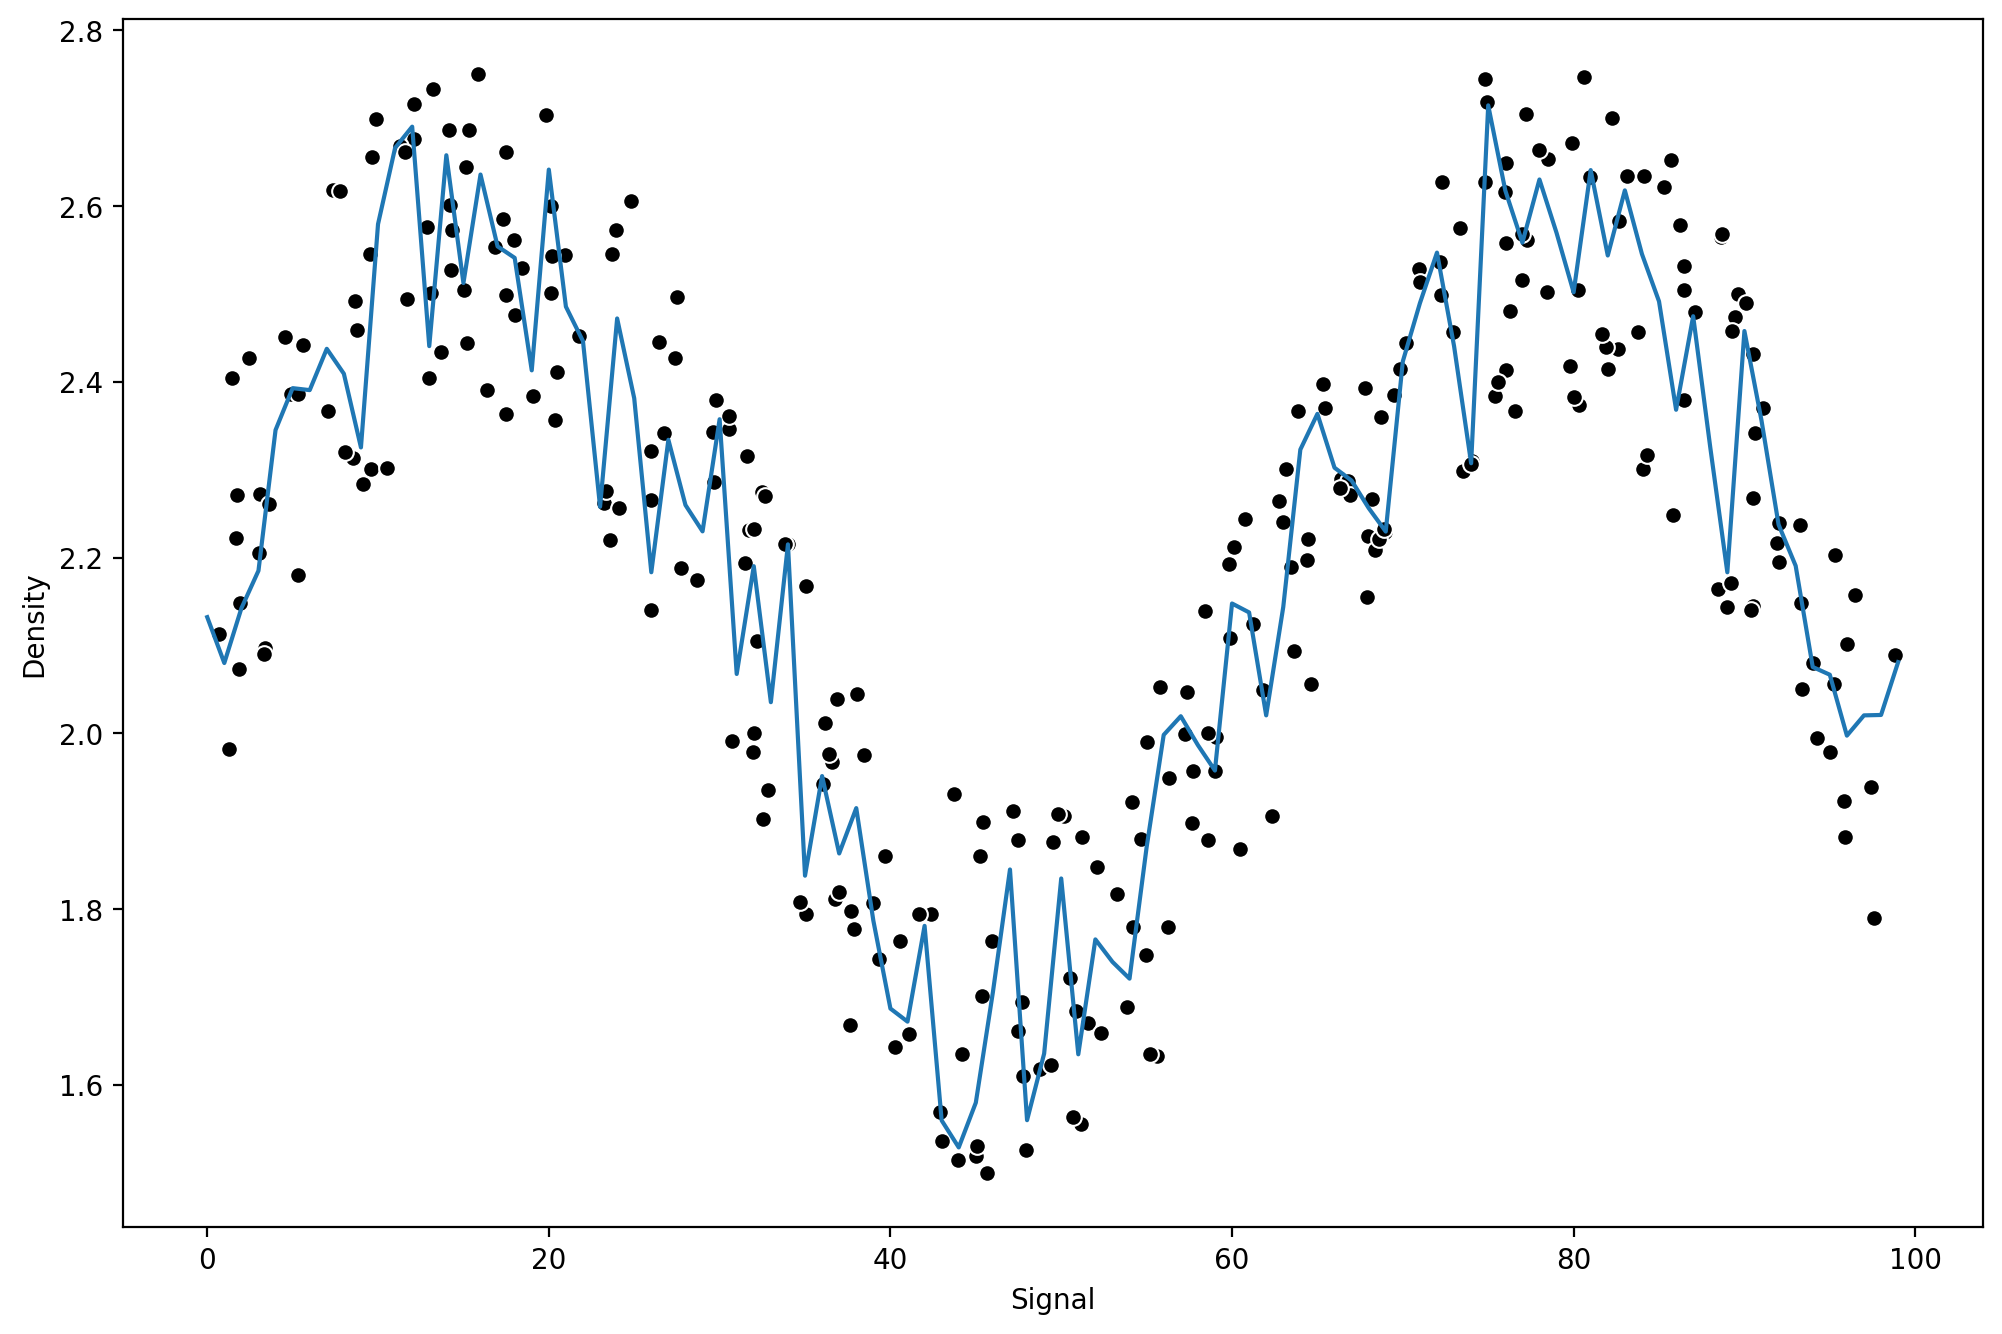

In [149]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [150]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [151]:
model = GradientBoostingRegressor()

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


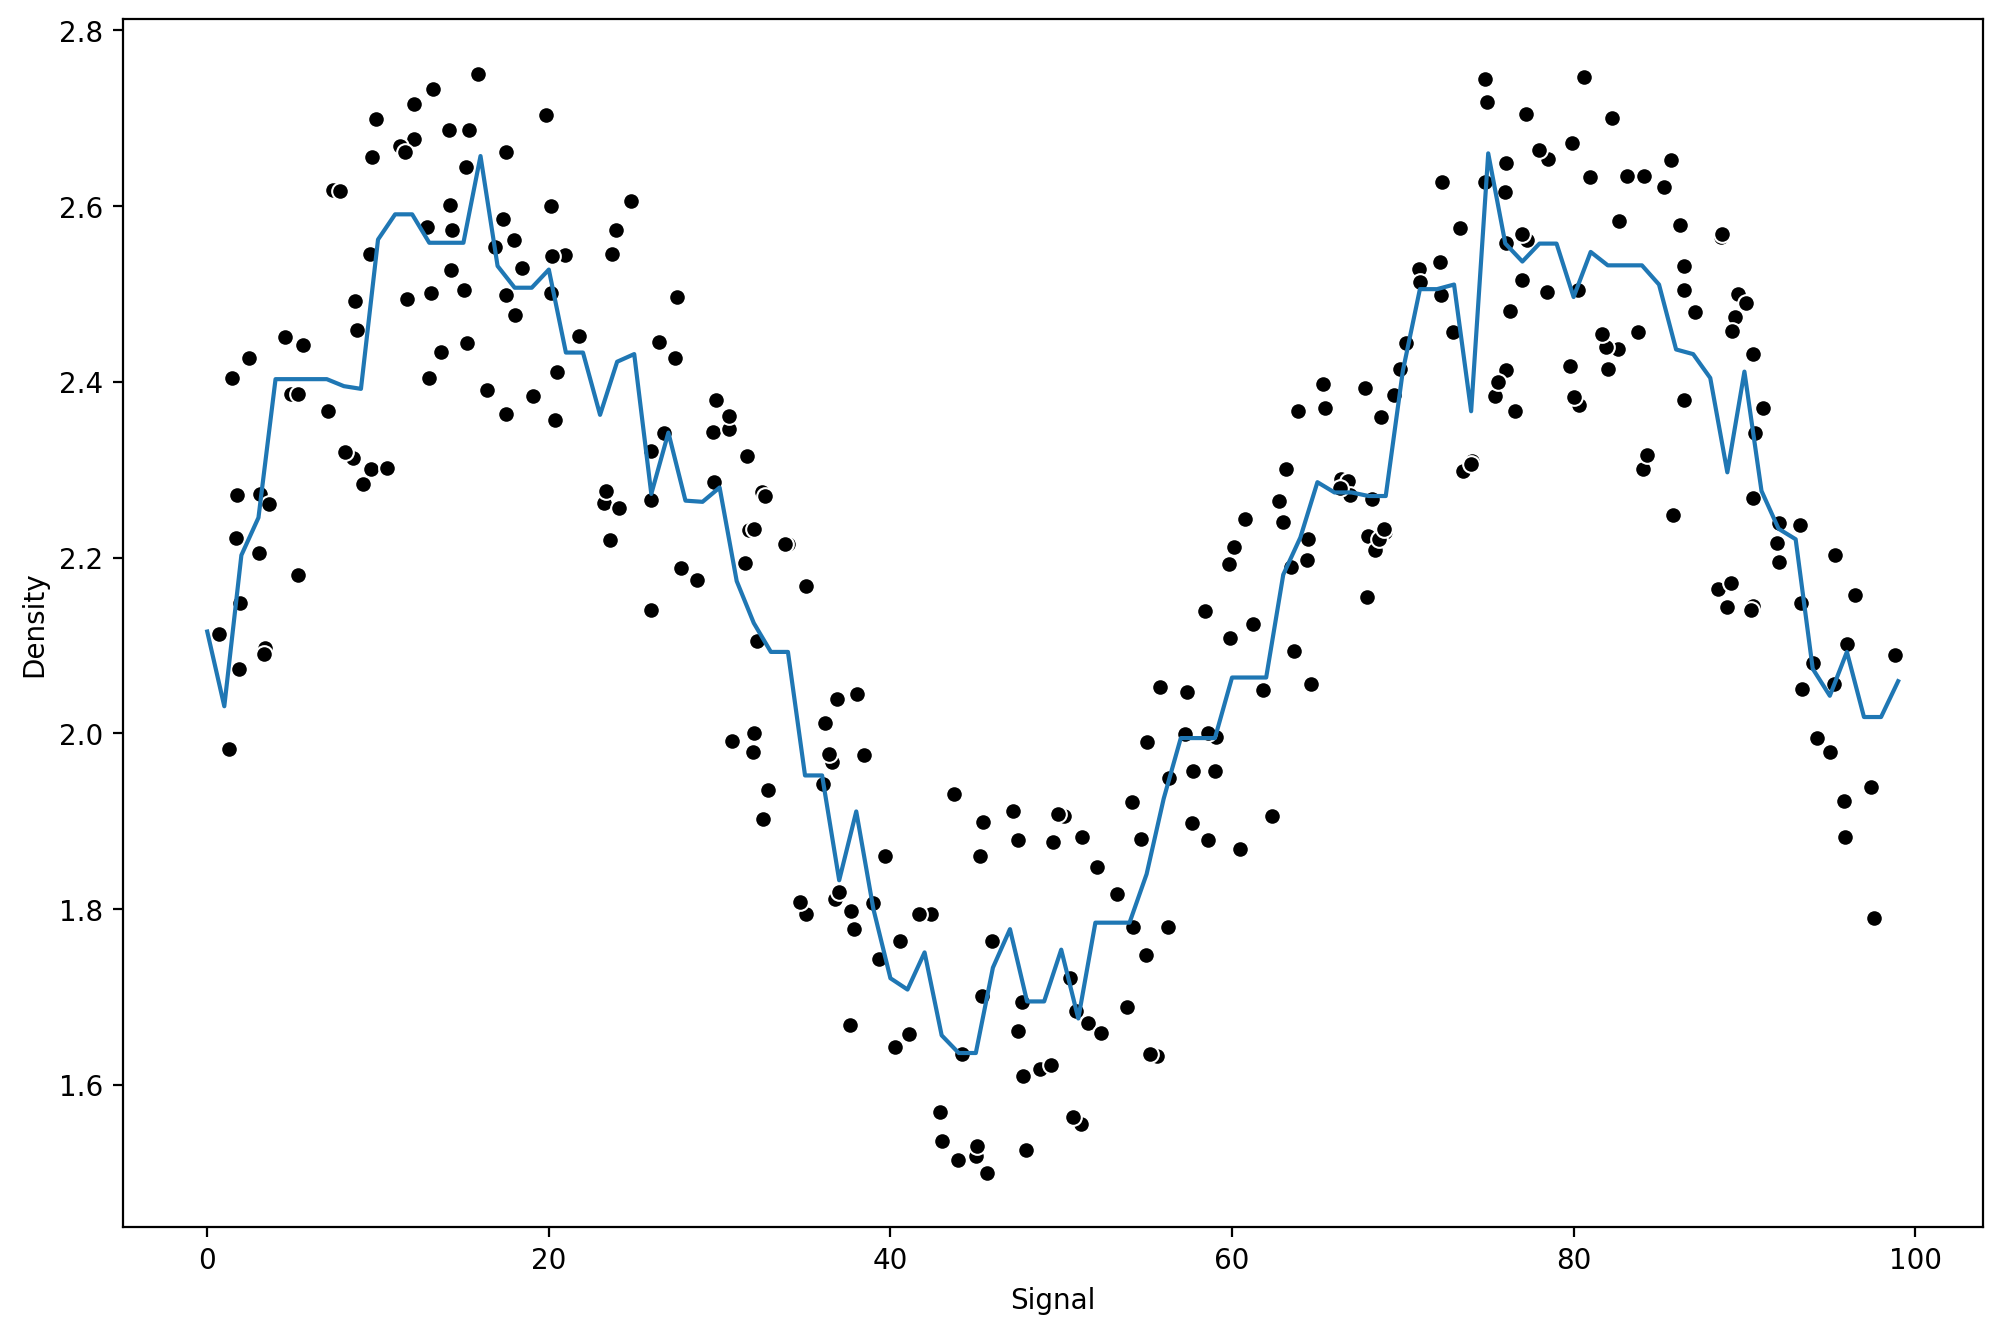

In [152]:
run_model(model,X_train,y_train,X_test,y_test)

MAE: 0.12107329383357991
RMSE: 0.1393031032165567


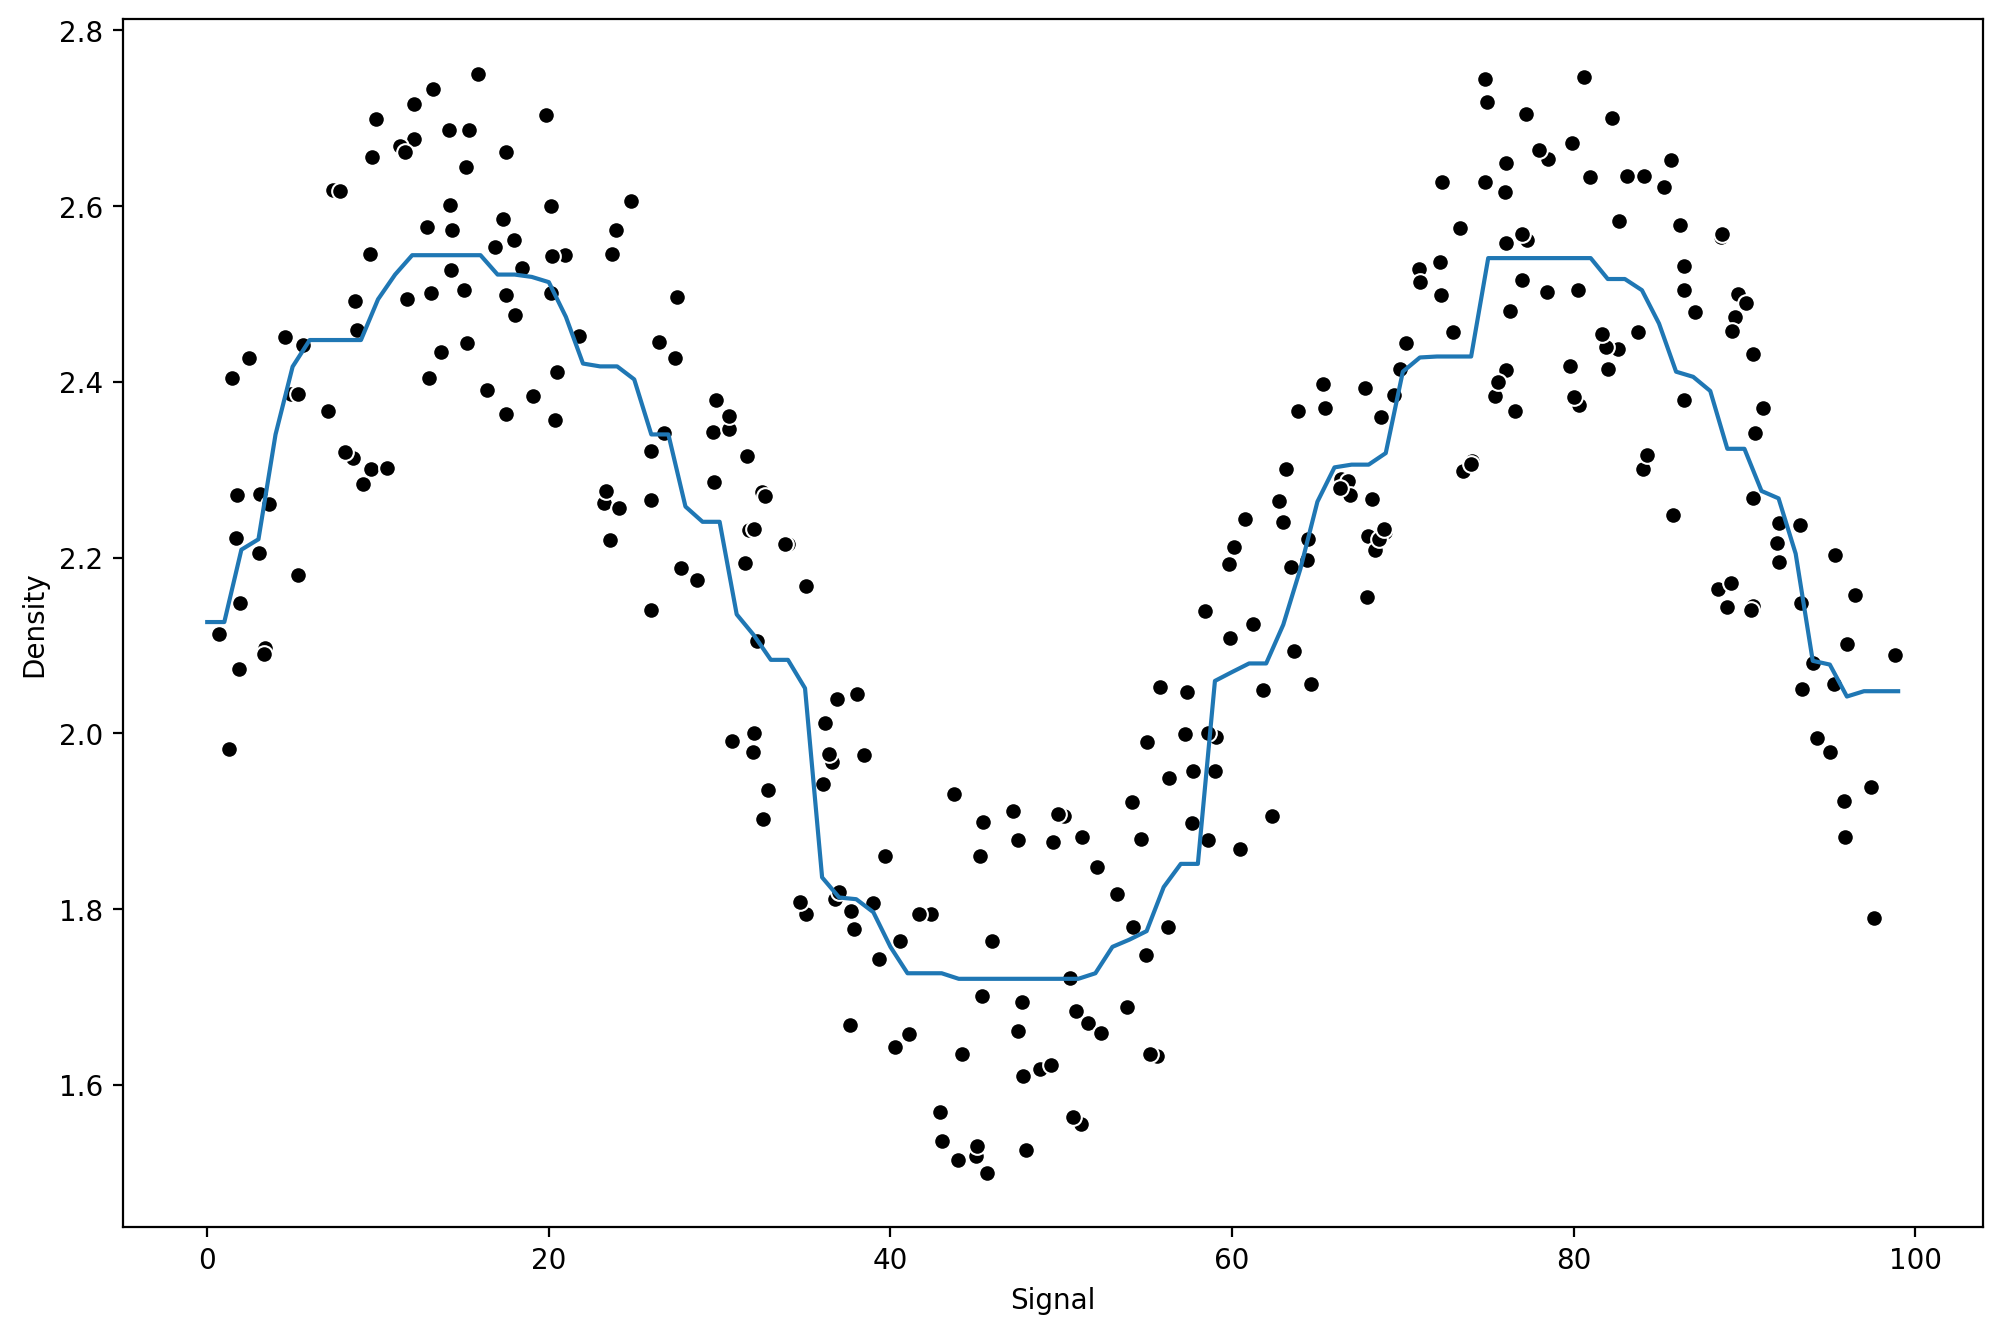

In [154]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test) 